### Student Information
Name:吳君慧

Student ID:113065539

GitHub ID:Iris6636

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

In [112]:
### Begin Assignment Here

## Second: follow the same process from the DM2024-Lab1-Master on the new dataset.

### 1. The Data
--> "Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data"
### 2. Data Preparation
-->see below

In [113]:
# categories
categories = ['not nostalgia','nostalgia']

In [114]:
import pandas as pd

# 從本地端讀取 CSV 檔案
data_path = "C:/Users/thpss/Downloads/DMLab1/DM2024-Lab1-Homework/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv"
df = pd.read_csv(data_path)

# 檢查前幾筆資料
print(df.head())

# 檢查每個類別的數量
print(df['sentiment'].value_counts())

       sentiment                                            comment
0  not nostalgia  He was a singer with a golden voice that I lov...
1      nostalgia  The mist beautiful voice ever I listened to hi...
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...
4      nostalgia  listening to his songs reminds me of my mum wh...
not nostalgia    750
nostalgia        750
Name: sentiment, dtype: int64


In [115]:
df[0:2]

sentiment                                            comment
0  not nostalgia  He was a singer with a golden voice that I lov...
1      nostalgia  The mist beautiful voice ever I listened to hi...

#### Exercise 1 

In [116]:
for comments in df.comment[0:3]:
    print(comments)

He was a singer with a golden voice that I love to hear all the time. I was his great fan at the age of 16years in those days and still now. Although we have many singers now, but, I can vouch for Jim Reeves all the time. You feel relaxed, emotional and loving. Thank you Lord for his life.
The mist beautiful voice ever I listened to him when I was a kid and still love his singing Never forgotten The voice of an angel
I have most of Mr. Reeves songs.  Always love his smooth voice, so comforting and sounds like the people I grew up around.  They were so gentle and sweet, but I had to leave my little town to find a job at age 17.  I graduated early.  I never forgot how great it was to grow up with simple people who had no pretensions -- just loving and gentle, like I think Jesus is.


### 3. Data Transformation

### 3.1 Converting Dictionary into Pandas Dataframe 
--> cuz i load it with pd.read csv, it's already in dataframe format

### Adding Columns

Encode sentiment as 0,1

In [117]:
# 新增一欄：將 'nostalgia' 編碼為 1，'not nostalgia' 編碼為 0
df['sentiment_encoded'] = df['sentiment'].apply(lambda x: 1 if x == 'nostalgia' else 0)

# 檢查前幾筆資料
print(df.head())

       sentiment                                            comment  \
0  not nostalgia  He was a singer with a golden voice that I lov...   
1      nostalgia  The mist beautiful voice ever I listened to hi...   
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...   
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...   
4      nostalgia  listening to his songs reminds me of my mum wh...   

   sentiment_encoded  
0                  0  
1                  1  
2                  1  
3                  0  
4                  1  


### 3.2 Familiarizing yourself with the Data

### Exercise 2 
Experiment with other querying techniques using pandas dataframes. 

In [118]:
# 查詢 category_name 在特定列表中的資料
selected_sentiment = df[df['sentiment'].isin(['nostalgia'])]
print(selected_sentiment.head(5))

   sentiment                                            comment  \
1  nostalgia  The mist beautiful voice ever I listened to hi...   
2  nostalgia  I have most of Mr. Reeves songs.  Always love ...   
4  nostalgia  listening to his songs reminds me of my mum wh...   
5  nostalgia  Every time I heard this song as a child, I use...   
6  nostalgia  My dad loved listening to Jim Reeves, when I w...   

   sentiment_encoded  
1                  1  
2                  1  
4                  1  
5                  1  
6                  1  


### Exercise 3 :
Try to fetch records belonging to the ```sentiment - nostalgia``` , and query every 10th record. Only show the first 5 records.

In [119]:
print(df[df['sentiment']=='nostalgia'].iloc[::10][0:5])

    sentiment                                            comment  \
1   nostalgia  The mist beautiful voice ever I listened to hi...   
18  nostalgia  My Grandparents had a pub in the 1970's, this ...   
32  nostalgia  I remember my Mom listening to Jim over and ov...   
50  nostalgia  If I remember correctly, this song came out af...   
71  nostalgia  Gosh does this bring back memories. Nearly eve...   

    sentiment_encoded  
1                   1  
18                  1  
32                  1  
50                  1  
71                  1  


### 4. Data Mining using Pandas

### 4.1 Missing Values
->check isnull()

In [120]:
# check missing values
df.isnull()

sentiment  comment  sentiment_encoded
0         False    False              False
1         False    False              False
2         False    False              False
3         False    False              False
4         False    False              False
...         ...      ...                ...
1495      False    False              False
1496      False    False              False
1497      False    False              False
1498      False    False              False
1499      False    False              False

[1500 rows x 3 columns]

In [121]:
# TA's functions
import helpers.data_mining_helpers as dmh

In [122]:
df.isnull().apply(lambda x: dmh.check_missing_values(x))  # default axis=0, scan by row

sentiment                             comment  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                    sentiment_encoded  
0  The amoung of missing records is:   
1                                   0

### Exercise 4
calculate the missing values in every record

In [123]:
df.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)  # axis=1, check by column

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
1495    (The amoung of missing records is: , 0)
1496    (The amoung of missing records is: , 0)
1497    (The amoung of missing records is: , 0)
1498    (The amoung of missing records is: , 0)
1499    (The amoung of missing records is: , 0)
Length: 1500, dtype: object

### 4.2 Dealing with Duplicate Data

In [124]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1495    False
1496    False
1497    False
1498    False
1499    False
Length: 1500, dtype: bool

In [125]:
sum(df.duplicated())

1

In [126]:
len(df)

1500

In [127]:
# 找出重複的列，keep=False 會顯示所有重複的資料（包括第一次出現的）
duplicates = df[df.duplicated(keep=False)]

# 顯示重複的資料
print(duplicates)


        sentiment                                            comment  \
62  not nostalgia  never heard this song before... WOW What an am...   
78  not nostalgia  never heard this song before... WOW What an am...   

    sentiment_encoded  
62                  0  
78                  0  


In [128]:
df.drop_duplicates(keep='first', inplace=True) # 只保留重複項的第一筆

In [129]:
sum(df.duplicated())

0

In [130]:
len(df)

1499

### 5. Data Preprocessing
--> 這個notebook 因為資料集本身就不大，故沒有做 sampleing

### Exercise 7 
--> 使用自定義 upper bound 去ylim 設定，而非 hard-coding 設置，讓圖片表現更好

--> 以下畫圖比較 sentiment中數量差異

In [131]:
import matplotlib.pyplot as plt
%matplotlib inline

nostalgia        750
not nostalgia    749
Name: sentiment, dtype: int64


<Axes: title={'center': 'sentiment distribution'}>

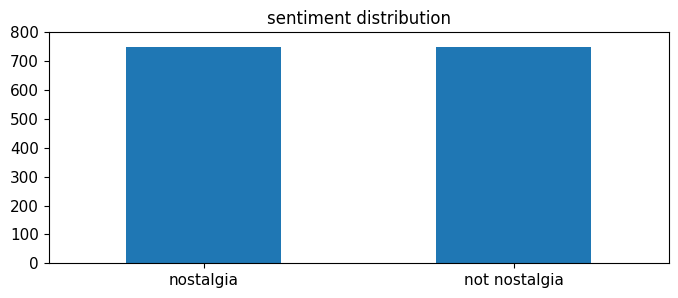

In [132]:
print(df.sentiment.value_counts())
upper_bound = max(df.sentiment.value_counts()+ 50 )
# plot barchart for X
df.sentiment.value_counts().plot(kind = 'bar',
                                    title = 'sentiment distribution',
                                    ylim = [0, upper_bound],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

### 5.2 Feature Creation
--> 使用 nltk 處理 text tokenizing

In [133]:
import nltk

In [134]:
# takes a like a minute or two to process
df['unigrams'] = df['comment'].apply(lambda x: dmh.tokenize_text(x))

In [135]:
df[0:4]["unigrams"]

0    [He, was, a, singer, with, a, golden, voice, t...
1    [The, mist, beautiful, voice, ever, I, listene...
2    [I, have, most, of, Mr., Reeves, songs, ., Alw...
3    [30, day, leave, from, 1st, tour, in, Viet, Na...
Name: unigrams, dtype: object

In [136]:
df[0:4]

sentiment                                            comment  \
0  not nostalgia  He was a singer with a golden voice that I lov...   
1      nostalgia  The mist beautiful voice ever I listened to hi...   
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...   
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...   

   sentiment_encoded                                           unigrams  
0                  0  [He, was, a, singer, with, a, golden, voice, t...  
1                  1  [The, mist, beautiful, voice, ever, I, listene...  
2                  1  [I, have, most, of, Mr., Reeves, songs, ., Alw...  
3                  0  [30, day, leave, from, 1st, tour, in, Viet, Na...

In [137]:
list(df[1:2]['unigrams'])

[['The',
  'mist',
  'beautiful',
  'voice',
  'ever',
  'I',
  'listened',
  'to',
  'him',
  'when',
  'I',
  'was',
  'a',
  'kid',
  'and',
  'still',
  'love',
  'his',
  'singing',
  'Never',
  'forgotten',
  'The',
  'voice',
  'of',
  'an',
  'angel']]

### 5.3 Feature subset selection

In [138]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.comment) #learn the vocabulary and return document-term matrix
print(df_counts[0])

  (0, 1598)	1
  (0, 3570)	2
  (0, 2973)	1
  (0, 3650)	1
  (0, 1470)	1
  (0, 3534)	1
  (0, 3282)	1
  (0, 2028)	1
  (0, 3336)	1
  (0, 1606)	1
  (0, 233)	2
  (0, 3284)	3
  (0, 3328)	2
  (0, 1651)	2
  (0, 1512)	1
  (0, 1249)	1
  (0, 323)	1
  (0, 214)	1
  (0, 2341)	1
  (0, 15)	1
  (0, 1733)	1
  (0, 3304)	1
  (0, 907)	1
  (0, 258)	2
  (0, 3124)	1
  (0, 2328)	2
  (0, 245)	1
  (0, 3581)	1
  (0, 1591)	1
  (0, 2082)	1
  (0, 2974)	1
  (0, 573)	1
  (0, 593)	1
  (0, 3538)	1
  (0, 1347)	2
  (0, 1833)	1
  (0, 2671)	1
  (0, 3713)	2
  (0, 1272)	1
  (0, 2688)	1
  (0, 1125)	1
  (0, 2035)	1
  (0, 3278)	1
  (0, 2018)	1
  (0, 1964)	1


In [139]:
count_vect.get_feature_names_out()[3570]

'was'

In [140]:
analyze = count_vect.build_analyzer()

In [141]:
analyze(df.comment[0])

['he',
 'was',
 'singer',
 'with',
 'golden',
 'voice',
 'that',
 'love',
 'to',
 'hear',
 'all',
 'the',
 'time',
 'was',
 'his',
 'great',
 'fan',
 'at',
 'the',
 'age',
 'of',
 '16years',
 'in',
 'those',
 'days',
 'and',
 'still',
 'now',
 'although',
 'we',
 'have',
 'many',
 'singers',
 'now',
 'but',
 'can',
 'vouch',
 'for',
 'jim',
 'reeves',
 'all',
 'the',
 'time',
 'you',
 'feel',
 'relaxed',
 'emotional',
 'and',
 'loving',
 'thank',
 'you',
 'lord',
 'for',
 'his',
 'life']

In [142]:
df_counts.shape

(1499, 3730)

### Exercise 10 
--> 去確認標示1的字是什麼

In [143]:
# we convert from sparse array to normal array
df_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [144]:
#上面可得知在第1行 comment 中看到的第15個向量存在，故查看一下第15個向量代表什麼單字
count_vect.get_feature_names_out()[15:16]

array(['16years'], dtype=object)

### 使用 Seaborn heatmap 查看分布狀況

In [145]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
# obtain document index
plot_y = ["line_"+ str(i) for i in list(df.index)[0:20]]
plot_z = df_counts[0:20, 0:20].toarray() #df_counts[how many documents, how many terms]
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

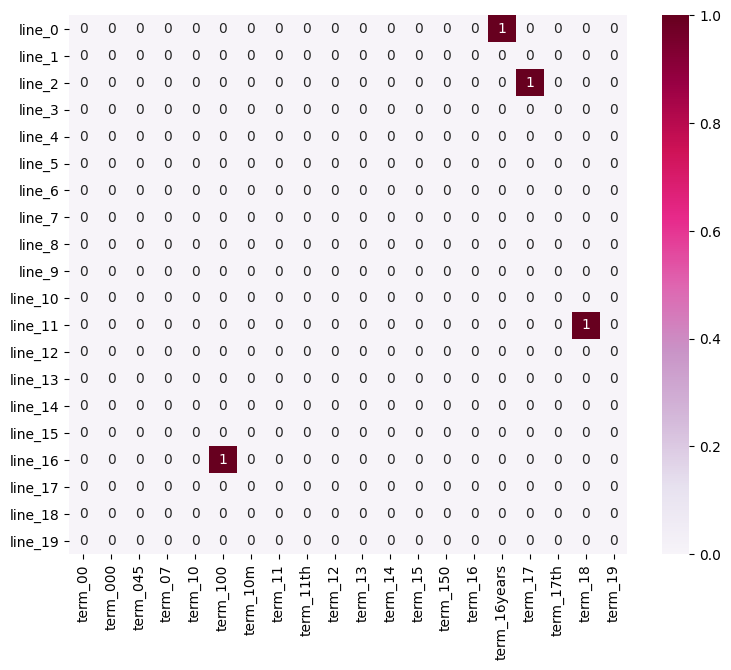

In [146]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### Exercise 11 
--> 把頻率最高的挑出來，看看能不能得到比較有用的資訊

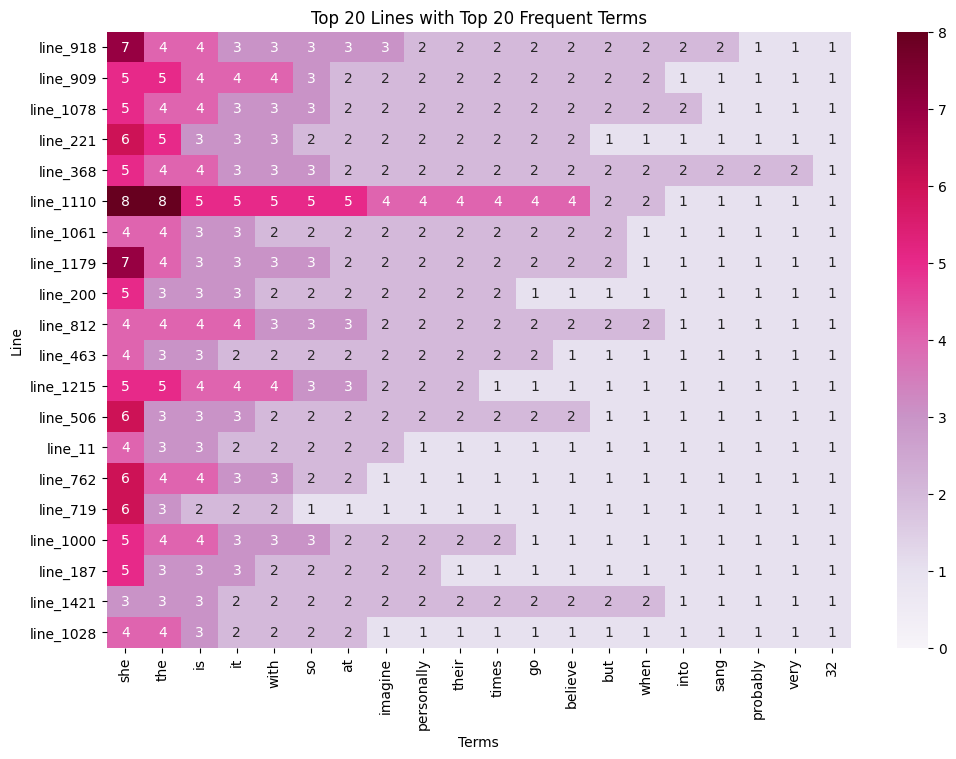

In [147]:
import numpy as np
# 計算每則comment的總詞頻數
line_frequencies = df_counts.sum(axis=1).A1  # 確保為一維array

# 找出總詞頻最高的20行評論的索引
top_20_line_indices = np.argsort(line_frequencies)[-20:][::-1]

# 選出這些comment對應的詞頻矩陣
top_20_line = df_counts[top_20_line_indices]

# 將每則comment中出現次數最多的20個詞彙找出
top_terms_per_line = []
for line in top_20_line:
    term_freqs = line.toarray().flatten()
    top_20_term_indices = np.argsort(term_freqs)[-20:][::-1]
    top_terms_per_line.append(term_freqs[top_20_term_indices])

# 將結果轉為DataFrame以供繪圖
plot_z = np.array(top_terms_per_line)
plot_x = count_vect.get_feature_names_out()[top_20_term_indices]
plot_y = [f"line_{i}" for i in top_20_line_indices]

df_todraw = pd.DataFrame(plot_z, columns=plot_x, index=plot_y)

# 繪製heatmap
plt.subplots(figsize=(12, 8))
ax = sns.heatmap(df_todraw, cmap="PuRd", vmin=0, vmax=df_todraw.values.max(), annot=True, fmt="d")

# 設置標題和座標軸
ax.set_title("Top 20 Lines with Top 20 Frequent Terms")
ax.set_xlabel("Terms")
ax.set_ylabel("Line")
plt.show()

#備註: heatmap 其實表現上最多字的看起來還是stop words

### 5.4 Attribute Transformation / Aggregation
--> 確認每個詞的頻率

In [148]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,df_counts.shape[1]):
    term_frequencies.append(sum(df_counts[:,j].toarray()))

In [149]:
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]

In [150]:
term_frequencies[0] #sum of first term: 00

1

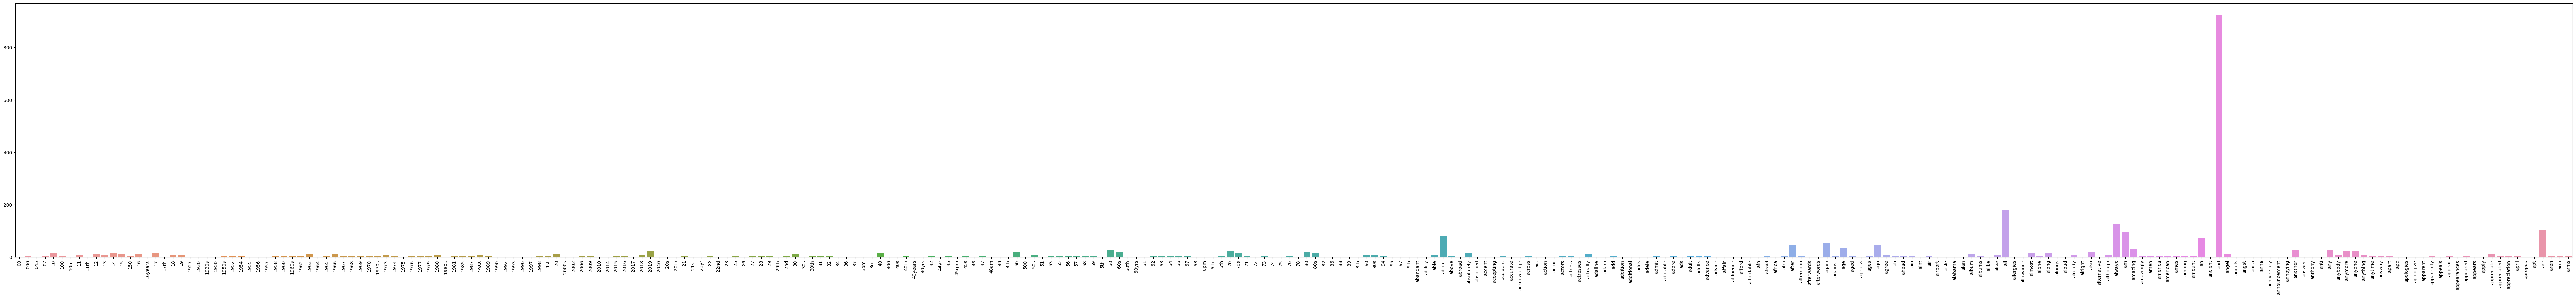

In [151]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

### Exercise 13
--> 只抓詞頻最高的前50個單字，讓圖表資訊更集中

In [152]:
# 將 term_frequencies 中的數值提取為普通的整數
flat_term_frequencies = [int(freq) for freq in term_frequencies]

# 建立 DataFrame 並排序
df_freq = pd.DataFrame({
    "Word": count_vect.get_feature_names_out(),
    "Frequency": flat_term_frequencies
})

# 將 Frequency 欄位轉換為數值型別
df_freq["Frequency"] = pd.to_numeric(df_freq["Frequency"], errors='coerce')

# 全部詞彙排序，依照頻率由高到低排序
sorted_df_freq = df_freq.sort_values(by="Frequency", ascending=False)

In [153]:
df_freq

Word  Frequency
0          00          1
1         000          2
2         045          1
3          07          2
4          10         16
...       ...        ...
3725      yrs          5
3726      yuo          1
3727      yup          1
3728  zealand          1
3729    zulus          1

[3730 rows x 2 columns]

In [154]:
# 取出頻率最高的前 50 個詞彙
top_50_freq_df = sorted_df_freq .head(50)

In [155]:
# 確認 term_frequencies 的內容是否合理
print(term_frequencies[:50])  # 查看前 50 個頻率值

[ 1  2  1  2 16  5  1  8  1 11  8 15 10  2 12  1 13  1  9  6  1  1  1  1
  3  2  4  1  1  1  2  5  3  2 12  1  3 10  3  2  2  5  3  7  2  1  4  3
  2  7]


In [156]:
print("\n頻率最高的前 50 個詞彙：")
display(top_50_freq_df)


頻率最高的前 50 個詞彙：


Word  Frequency
3284        the       1351
3300       this        997
3336         to        937
258         and        923
2254         my        765
3044       song        748
2341         of        722
1733         in        612
1804         it        586
3570        was        584
2114         me        388
1798         is        375
3713        you        367
3282       that        360
3025         so        315
2028       love        309
3610       when        299
358        back        290
1347        for        278
2245      music        267
2142   memories        244
2357         on        240
3650       with        222
3328       time        213
1512      great        209
573         but        195
1591       have        186
3704      years        184
233         all        181
1598         he        178
410   beautiful        172
313          as        171
1969       like        169
2359        one        167
3045      songs        160
2351        old        159
1858       just        154
1630        her        153
3581         we        143
2915        she        142
400          be        139
1386       from        139
323          at        139
1473       good        138
3534      voice        137
2328        now        137
2319        not        137
3607       what        136
593         can        136
2699   remember        132

In [157]:
print(top_50_freq_df.dtypes)

Word         object
Frequency     int64
dtype: object


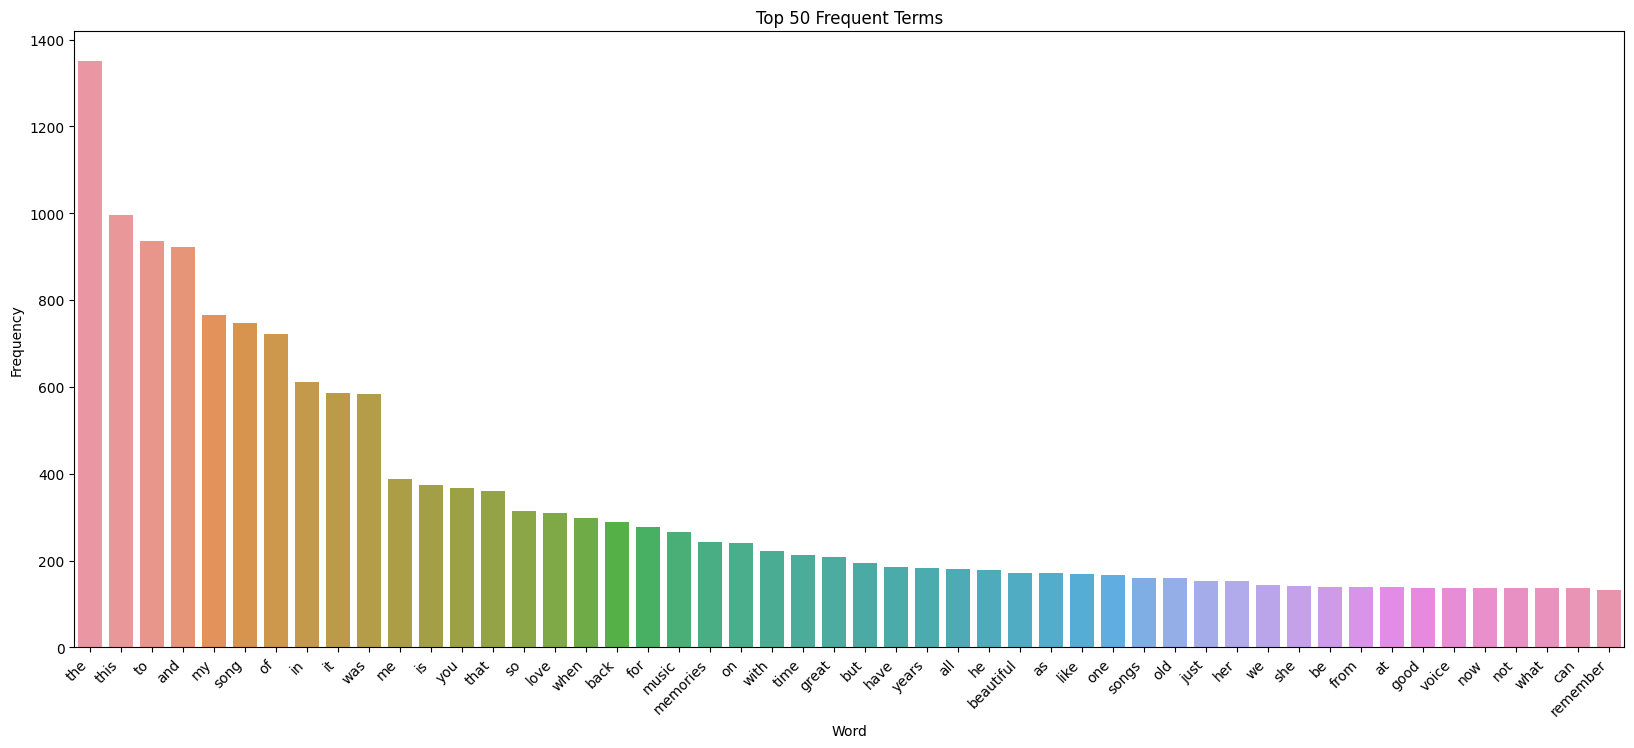

In [158]:
# 目標 只抓頻率最高的前50個作圖

# 使用 Seaborn 繪製條形圖
plt.subplots(figsize=(20, 8))  # 調整圖表大小
g = sns.barplot(x="Word", y="Frequency", data=top_50_freq_df)
g.set_xticklabels(g.get_xticklabels(), rotation=45, ha='right')  # 調整 X 軸標籤角度
plt.title("Top 50 Frequent Terms")  # 設定標題
plt.show()

### Exercise 15
--> 確認如果對頻率取log後 分布狀況會長怎樣

In [159]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

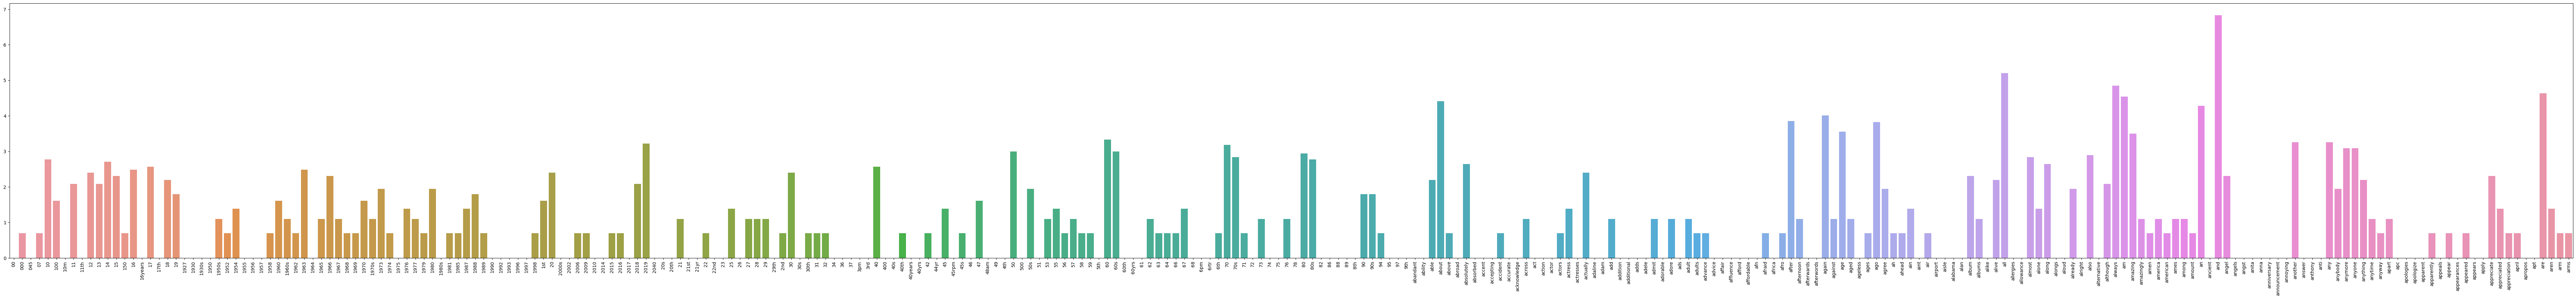

In [160]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

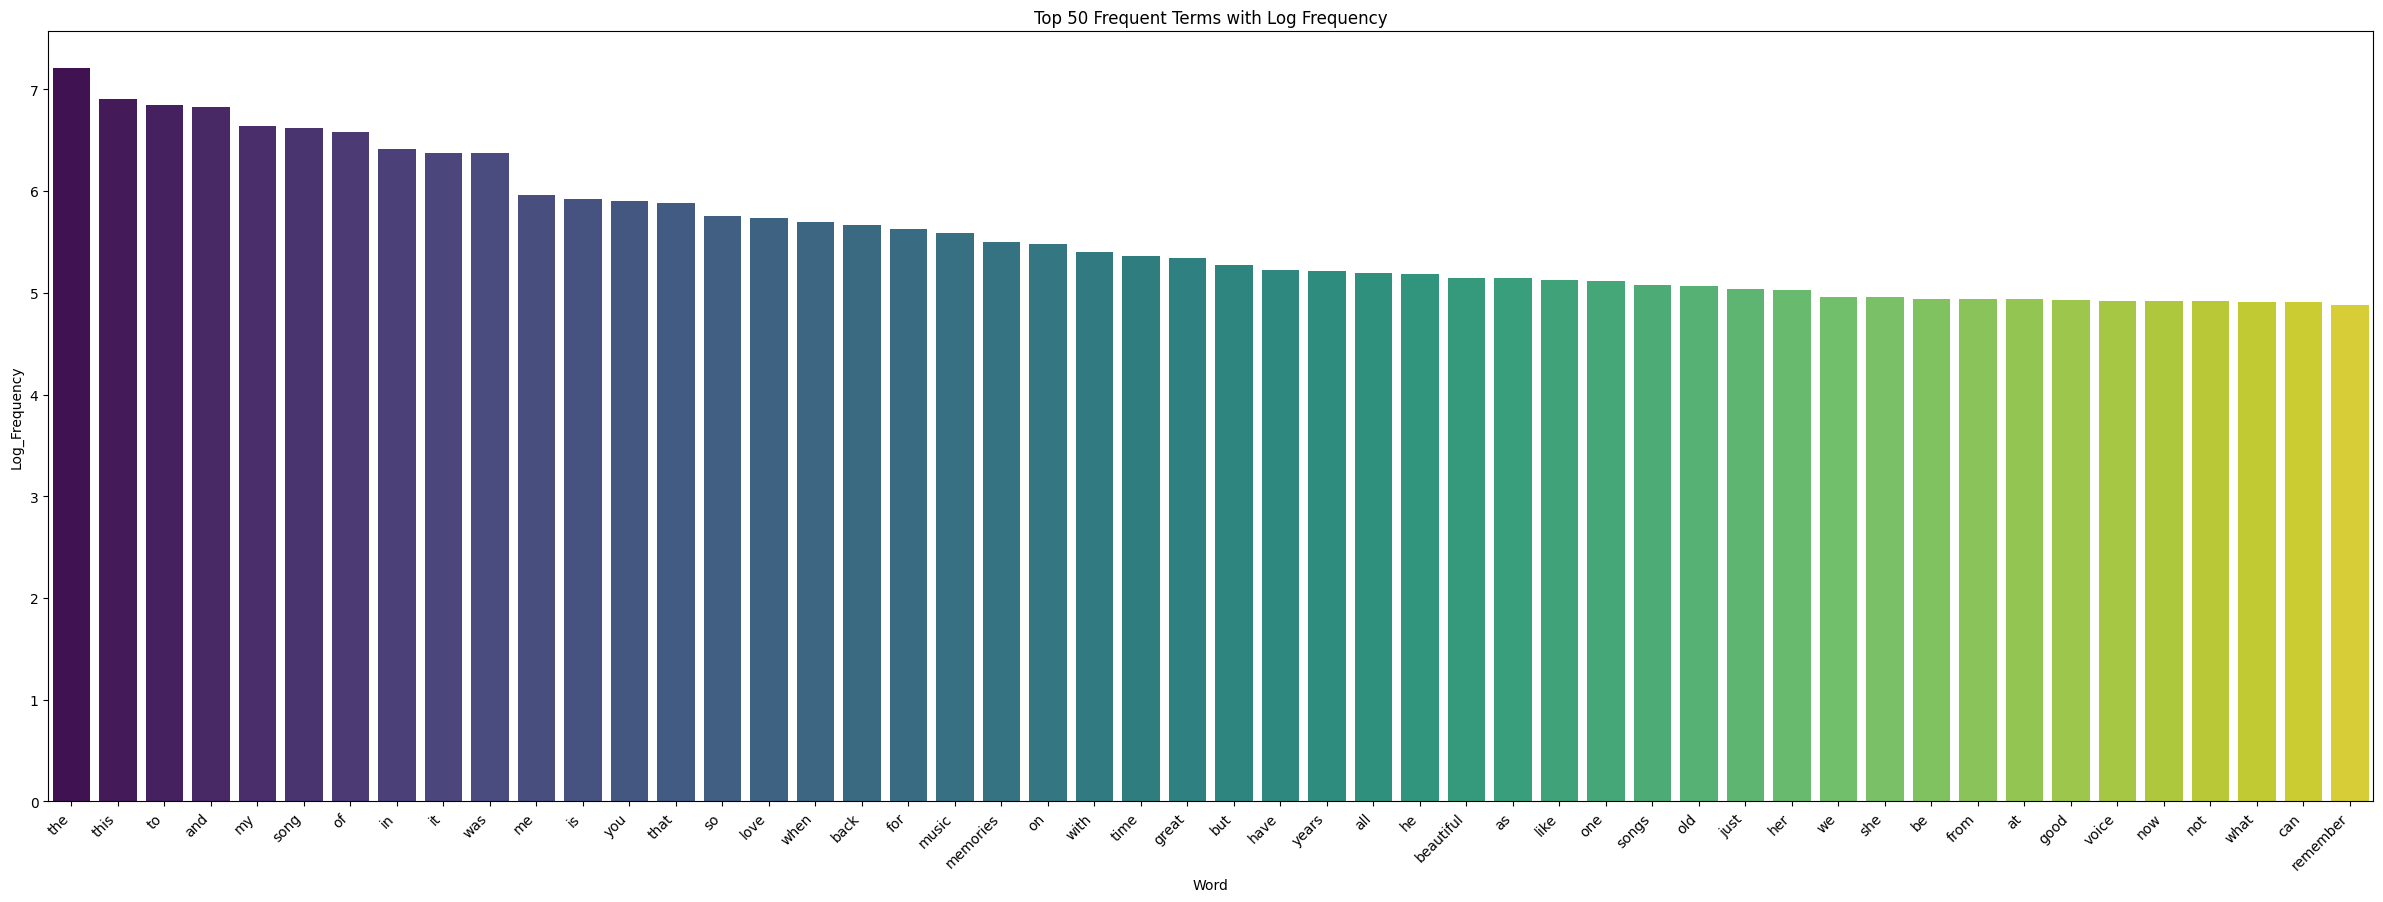

In [161]:
# 建立 DataFrame 並添加 Log 頻率
df_freq['Log_Frequency'] = term_frequencies_log

# 將 DataFrame 排序並取出前 50 個詞彙
df_sorted_log = df_freq.sort_values(by="Log_Frequency", ascending=False).head(50)

# 使用 Seaborn 繪製條形圖，x 軸為詞彙，y 軸為 log 頻率
plt.subplots(figsize=(30, 10))  # 調整圖表大小
g = sns.barplot(x="Word", y="Log_Frequency", data=df_sorted_log,  palette="viridis")

# 調整 X 軸標籤角度和標題
g.set_xticklabels(g.get_xticklabels(), rotation=45, ha='right')
plt.title("Top 50 Frequent Terms with Log Frequency")  # 設定標題
plt.show()



可以看到上圖前50個高頻詞的頻率在取了log 後，差異變小了

### Finding frequent patterns --> With PAMI

In [162]:
df

sentiment                                            comment  \
0     not nostalgia  He was a singer with a golden voice that I lov...   
1         nostalgia  The mist beautiful voice ever I listened to hi...   
2         nostalgia  I have most of Mr. Reeves songs.  Always love ...   
3     not nostalgia  30 day leave from 1st tour in Viet Nam to conv...   
4         nostalgia  listening to his songs reminds me of my mum wh...   
...             ...                                                ...   
1495  not nostalgia  i don't know!..but the opening of the video,.....   
1496  not nostalgia  it's sad this is such a beautiful song when yo...   
1497  not nostalgia  Dear Friend, I think age and time is not that ...   
1498      nostalgia  I was born in 1954 and started to be aware of ...   
1499      nostalgia  This is the first CD I bought after my marriag...   

      sentiment_encoded                                           unigrams  
0                     0  [He, was, a, singer, with, a, golden, voice, t...  
1                     1  [The, mist, beautiful, voice, ever, I, listene...  
2                     1  [I, have, most, of, Mr., Reeves, songs, ., Alw...  
3                     0  [30, day, leave, from, 1st, tour, in, Viet, Na...  
4                     1  [listening, to, his, songs, reminds, me, of, m...  
...                 ...                                                ...  
1495                  0  [i, do, n't, know, !, .., but, the, opening, o...  
1496                  0  [it, 's, sad, this, is, such, a, beautiful, so...  
1497                  0  [Dear, Friend, ,, I, think, age, and, time, is...  
1498                  1  [I, was, born, in, 1954, and, started, to, be,...  
1499                  1  [This, is, the, first, CD, I, bought, after, m...  

[1499 rows x 4 columns]

In [163]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# 取得唯一的 sentiment 類別標籤
categories = df['sentiment'].unique()  # 例如 ['nostalgia', 'not nostalgia']

# 建立一個字典來儲存每個 sentiment 的 DataFrame
category_dfs = {}

for category in categories:
    # 根據 sentiment 篩選出對應的 DataFrame
    category_dfs[category] = df[df['sentiment'] == category].copy()

# 定義函數來為每個類別建立 term-document matrix DataFrame
def create_term_document_df(df):
    count_vect = CountVectorizer()  # 初始化 CountVectorizer
    X_counts = count_vect.fit_transform(df['comment'])  # 將 comment 欄位轉換為詞頻矩陣
    
    # 取得詞彙 (vocabulary)
    words = count_vect.get_feature_names_out()
    
    # 建立 DataFrame，列為文件，欄為詞彙
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# 建立每個 sentiment 的 term-document matrix 並儲存在字典中
filt_term_document_dfs = {}

for category in categories:
    filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])

# 顯示其中一個類別的 term-document matrix 作為範例
print(f"Term-Document Matrix for '{categories[0]}' sentiment:")
print(filt_term_document_dfs[categories[0]].head())


Term-Document Matrix for 'not nostalgia' sentiment:
   00  000  045  10  100  10m  11  12  14  15  ...  youngest  youngsters  \
0   0    0    0   0    0    0   0   0   0   0  ...         0           0   
1   0    0    0   0    0    0   0   0   0   0  ...         0           0   
2   0    0    0   0    0    0   0   0   0   0  ...         0           0   
3   0    0    0   0    0    0   0   0   0   0  ...         0           0   
4   0    0    0   0    0    0   0   0   0   0  ...         0           0   

   your  yourself  youth  youtube  yrs  yuo  zealand  zulus  
0     0         0      0        0    0    0        0      0  
1     0         0      0        0    0    0        0      0  
2     0         0      0        0    0    0        0      0  
3     0         0      0        0    0    0        0      0  
4     0         0      0        0    0    0        0      0  

[5 rows x 2602 columns]


In [164]:
print(f"Term-Document Matrix for '{categories[1]}' sentiment:")
print(filt_term_document_dfs[categories[1]].head())

Term-Document Matrix for 'nostalgia' sentiment:
   07  10  11  11th  12  13  14  15  16  17  ...  young  younger  youngster  \
0   0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
1   0   0   0     0   0   0   0   0   0   1  ...      0        0          0   
2   0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
3   0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
4   0   0   0     0   0   0   0   0   0   0  ...      0        0          0   

   your  yours  youth  youthful  youtube  yrs  yup  
0     0      0      0         0        0    0    0  
1     0      0      0         0        0    0    0  
2     0      0      0         0        0    0    0  
3     1      0      0         0        0    0    0  
4     0      0      0         0        0    0    0  

[5 rows x 2295 columns]


### 先確認整體 Frequency 分布 

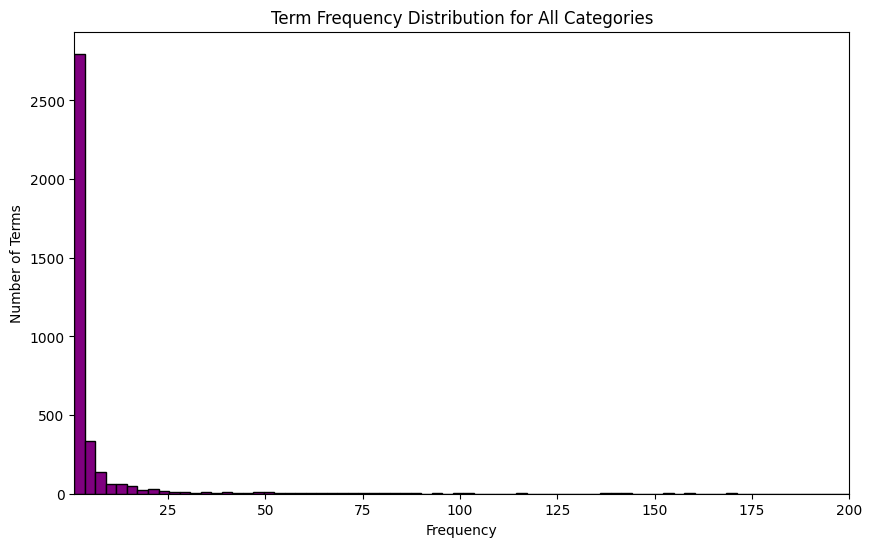

In [165]:
# 將所有類別的矩陣合併並計算總詞頻
all_categories_matrix = pd.concat(filt_term_document_dfs.values()).sum(axis=0).to_numpy()

# 視覺化所有類別的詞頻分佈
plt.figure(figsize=(10, 6))
plt.hist(all_categories_matrix, bins=500, color='purple', edgecolor='black')
plt.title('Term Frequency Distribution for All Categories')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)  # 可調整 X 軸範圍來集中觀察
plt.show()

### 然後把frequency前5% 跟 最後 1%的資料移除

In [166]:

# 設定要分析的類別，並選擇相應的 DataFrame
category_name = 'nostalgia'  
category_df = filt_term_document_dfs[category_name]  # 取出對應類別的 term-document matrix

# 計算每個詞的總頻率（所有文件中加總）
word_counts = category_df.sum(axis=0).to_numpy()

# 將詞頻進行排序（降冪排序）
sorted_indices = np.argsort(word_counts)[::-1]
sorted_counts = np.sort(word_counts)[::-1]

# 計算前 5% 詞彙的數量
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)

# 取得前 5% 高頻詞的索引
top_5_percent_indices = sorted_indices[:top_5_percent_index]

# 取得前 5% 詞彙的名稱
filtered_words = [category_df.columns[i] for i in top_5_percent_indices]

# 印出結果
print(f"類別: {category_name}")
print(f"前 5% 詞彙的數量: {top_5_percent_index}")
print(f"前 5% 的詞彙: {filtered_words}")


類別: nostalgia
前 5% 詞彙的數量: 114
前 5% 的詞彙: ['the', 'my', 'this', 'to', 'and', 'song', 'was', 'of', 'in', 'it', 'me', 'back', 'memories', 'when', 'so', 'years', 'that', 'on', 'love', 'for', 'time', 'you', 'remember', 'old', 'with', 'is', 'music', 'great', 'brings', 'we', 'beautiful', 'as', 'all', 'but', 'now', 'days', 'at', 'miss', 'good', 'songs', 'childhood', 'reminds', 'her', 'from', 'still', 'he', 'just', 'always', 'have', 'she', 'first', 'dad', 'many', 'had', 'much', 'listening', 'his', 'like', 'loved', 'up', 'used', 'school', 'were', 'very', 'am', 'one', 'those', 'voice', 'every', 'be', 'him', 'never', 'heard', 'times', 'these', 'can', 'listen', 'not', 'young', 'what', 'are', 'best', 'they', 'played', 'hear', 'thank', 'sing', 'out', 'how', 'life', 'happy', 'thanks', 'then', 'radio', 'again', 'ago', 'really', 'mum', 'who', 'an', 'day', 'play', 'mom', 'there', 'some', 'our', 'after', 'came', 'passed', 'makes', 'wonderful', 'singing', 'little', 'takes']


In [167]:
# 設定要分析的類別，並選擇相應的 DataFrame
category_name = 'nostalgia'  
category_df = filt_term_document_dfs[category_name]  # 取出對應類別的 term-document matrix

# 計算每個詞的總頻率（所有文件中加總）
word_counts = category_df.sum(axis=0).to_numpy()

# 將詞頻進行排序（降冪排序）
sorted_indices = np.argsort(word_counts)[::-1]
sorted_counts = np.sort(word_counts)[::-1]

# 計算前 0.5% 詞彙的數量
total_terms = len(sorted_counts)
top_05_percent_index = int(0.005 * total_terms)

# 取得前 0.5% 高頻詞的索引
top_05_percent_indices = sorted_indices[:top_05_percent_index]

# 取得前 05% 詞彙的名稱
filtered_words = [category_df.columns[i] for i in top_05_percent_indices]

# 印出結果
print(f"類別: {category_name}")
print(f"前 05% 詞彙的數量: {top_05_percent_index}")
print(f"前 05% 的詞彙: {filtered_words}")


類別: nostalgia
前 05% 詞彙的數量: 11
前 05% 的詞彙: ['the', 'my', 'this', 'to', 'and', 'song', 'was', 'of', 'in', 'it', 'me']


In [168]:
sorted_counts

array([643, 566, 545, ...,   1,   1,   1], dtype=int64)

In [169]:
for word in filtered_words:  # 'filtered_words' 是前 0.5% 高頻詞的列表
    total_count = filt_term_document_dfs[categories[0]].loc[:, word].sum(axis=0)
    print(f"Word: {word}, Total Count: {total_count}")


Word: the, Total Count: 708
Word: my, Total Count: 199
Word: this, Total Count: 452
Word: to, Total Count: 394
Word: and, Total Count: 451
Word: song, Total Count: 308
Word: was, Total Count: 152
Word: of, Total Count: 361
Word: in, Total Count: 263
Word: it, Total Count: 268
Word: me, Total Count: 88


#### comment: 如果使用 1% 的字，會發現除了stop words 以外還會抓到'back', 'memories'這些我覺得很重要的關鍵字，但是用0.5% 抓 也才抓到11個字，感覺這樣刪除的效果不好

In [170]:
# 設定要分析的類別，並選擇相應的 DataFrame
category_name = 'nostalgia'  
category_df = filt_term_document_dfs[category_name]  # 取出對應類別的 term-document matrix

# 計算每個詞的總頻率（所有文件中加總）
word_counts = category_df.sum(axis=0).to_numpy()

# 將詞頻進行排序（降冪排序）
sorted_indices = np.argsort(word_counts)
sorted_counts = np.sort(word_counts)

# 計算倒數 1 % 詞彙的數量
total_terms = len(sorted_counts)
bottom_1_percent_index = int(0.1 * total_terms)

# 取得倒數 1 % 高頻詞的索引
bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

# 取得倒數 1 % 詞彙的名稱
filtered_words = [category_df.columns[i] for i in bottom_1_percent_indices]

# 印出結果
print(f"類別: {category_name}")
print(f"倒數 1 % 詞彙的數量: {bottom_1_percent_index}")
print(f"倒數 1 % 的詞彙: {filtered_words}")


類別: nostalgia
倒數 1 % 詞彙的數量: 229
倒數 1 % 的詞彙: ['yup', 'gospel', 'rose', 'round', 'rousing', 'goodness', 'routine', 'row', 'ronnie', 'rpg', 'ruined', 'rules', 'running', 'sadder', 'saddest', 'glimpses', 'safer', 'rubbish', 'grabbed', 'grace', 'romanticism', 'rightly', 'ring', 'grandmom', 'rise', 'grandfathers', 'roads', 'robbie', 'grandchildren', 'grandchild', 'grand', 'gramophone', 'grammartical', 'gramaphone', 'rolled', 'graffiti', 'rolling', 'gradually', 'glasgow', 'grandsons', 'safety', 'given', 'gary', 'gardens', 'seeing', 'gal', 'gail', 'furniture', 'funner', 'gate', 'funfair', 'seirus', 'ft', 'self', 'sell', 'send', 'sends', 'friday', 'funerals', 'gather', 'secure', 'gem', 'san', 'sausage', 'girlfriends', 'save', 'sayer', 'ginny', 'ginnie', 'gifted', 'gf', 'schoolboy', 'screamed', 'seaside', 'genuine', 'seats', 'genesis', 'generations', 'secondary', 'sailing', 'rides', 'rich', 'greater', 'hdqrs', 'hawaii', 'havu', 'relatively', 'relaxed', 'hauntingly', 'hats', 'relationship', 'hati

In [171]:
# 設定要分析的類別，並選擇相應的 DataFrame
category_name = 'not nostalgia'  
category_df = filt_term_document_dfs[category_name]  # 取出對應類別的 term-document matrix

# 計算每個詞的總頻率（所有文件中加總）
word_counts = category_df.sum(axis=0).to_numpy()

# 將詞頻進行排序（降冪排序）
sorted_indices = np.argsort(word_counts)[::-1]
sorted_counts = np.sort(word_counts)[::-1]

# 計算前 5% 詞彙的數量
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)

# 取得前 5% 高頻詞的索引
top_5_percent_indices = sorted_indices[:top_5_percent_index]

# 取得前 5% 詞彙的名稱
filtered_words = [category_df.columns[i] for i in top_5_percent_indices]

# 印出結果
print(f"類別: {category_name}")
print(f"前 5% 詞彙的數量: {top_5_percent_index}")
print(f"前 5% 的詞彙: {filtered_words}")

類別: not nostalgia
前 5% 詞彙的數量: 130
前 5% 的詞彙: ['the', 'this', 'and', 'to', 'of', 'song', 'it', 'is', 'in', 'you', 'that', 'my', 'love', 'music', 'was', 'for', 'so', 'have', 'one', 'like', 'but', 'he', 'with', 'great', 'all', 'on', 'what', 'not', 'be', 'can', 'me', 'voice', 'just', 'as', 'beautiful', 'songs', 'her', 'time', 'she', 'will', 'they', 'when', 'from', 'his', 'at', 'are', 'always', 'good', 'no', 'know', 'now', 'never', 'much', 'about', 'who', 'really', 'if', 'we', 'more', 'best', 'ever', 'by', 'thank', 'think', 'would', 'only', 'how', 'don', 'still', 'has', 'very', 'there', 'am', 'out', 'him', 'these', 'could', 'up', 'old', 'hear', 'do', 'listen', 'an', 'singer', 'had', 'many', 'here', 'such', 'version', 'too', 'today', 'been', 'most', 'get', 'your', 'people', 'world', 'heard', 'man', 'video', 'some', 'sing', 'listening', 'real', 'years', 'were', 'than', 'singing', 'heart', 'nice', 'their', 'better', 'life', 'day', 'its', 'then', 'way', 'sad', 'those', 'did', 'god', 'come', 'why

####  comment: 如果是not nostalgia， 前5% 就沒有像 nostalgia 有感覺很關鍵的字，都是比較 general 一點的，not nostalgia 有 130個，nostalgia 有 114個，可能是因為較為 general 的字重複性較高

In [172]:
# 設定要分析的類別，並選擇相應的 DataFrame
category_name = 'not nostalgia'  
category_df = filt_term_document_dfs[category_name]  # 取出對應類別的 term-document matrix

# 計算每個詞的總頻率（所有文件中加總）
word_counts = category_df.sum(axis=0).to_numpy()

# 將詞頻進行排序（降冪排序）
sorted_indices = np.argsort(word_counts)
sorted_counts = np.sort(word_counts)

# 計算倒數 1 % 詞彙的數量
total_terms = len(sorted_counts)
bottom_1_percent_index = int(0.1 * total_terms)

# 取得倒數 1 % 高頻詞的索引
bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

# 取得倒數 1 % 詞彙的名稱
filtered_words = [category_df.columns[i] for i in bottom_1_percent_indices]

# 印出結果
print(f"類別: {category_name}")
print(f"倒數 1 % 詞彙的數量: {bottom_1_percent_index}")
print(f"倒數 1 % 的詞彙: {filtered_words}")


類別: not nostalgia
倒數 1 % 詞彙的數量: 260
倒數 1 % 的詞彙: ['00', 'montgomery', 'money', 'monday', 'moments', 'mocking', 'mock', 'mitch', 'misunderstood', 'minute', 'minds', 'miller', 'monumental', 'millennium', 'miles', 'microphone', 'miami', 'meta', 'mess', 'merle', 'mendes', 'mended', 'melting', 'melt', 'melodica', 'milestone', 'melodic', 'mood', 'moon', 'newcomers', 'netherlands', 'nelson', 'needed', 'necessary', 'nearly', 'nearest', 'nash', 'naples', 'nana', 'myanmar', 'moodier', 'musician', 'museum', 'mummy', 'muchm', 'ms', 'mph', 'moved', 'motor', 'motivate', 'mostly', 'mornings', 'moral', 'musically', 'mediterranean', 'media', 'mederios', 'losing', 'loping', 'loops', 'longer', 'lola', 'lock', 'location', 'local', 'lmao', 'lives', 'liverpool', 'loud', 'literally', 'listed', 'lisa', 'linen', 'limitlessly', 'lil', 'lifts', 'lifetime', 'lies', 'lie', 'levis', 'levi', 'listener', 'lover', 'lovey', 'lowest', 'medal', 'measure', 'materialistic', 'matched', 'masterpieces', 'master', 'massively', 

####  comment:在詞頻倒數 1% 的字，not nostalgia 有 260個，nostalgia 有 229個， 可能是因為not nostalgia的描述範圍更廣泛，所以有更多詞頻倒數 1% 的字

###  經評估，移除了前 0.5% 跟最後1%的詞頻的字

In [173]:
# 定義篩選函數：刪除頻率前 0.5% 和倒數 1% 的詞語
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.005, bottom_percent=0.01):
    # 計算每個詞的總頻率
    word_sums = term_document_df.sum(axis=0)
    
    # 對總頻率進行排序
    sorted_words = word_sums.sort_values()
    
    # 計算應刪除的詞數
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # 取得要刪除的詞語索引
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    
    # 列出被刪除的詞語，方便檢查
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}')
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}')
    
    # 返回篩選後的 DataFrame
    return term_document_df.drop(columns=words_to_remove)

# 建立篩選後的 DataFrame 字典
filtered_term_document_dfs = {}

# 對每個類別的 DataFrame 進行篩選
for category in filt_term_document_dfs:
    print(f'\nFor category {category}, we filter the following words:')
    filtered_term_document_dfs[category] = filter_top_bottom_words_by_sum(filt_term_document_dfs[category])





For category not nostalgia, we filter the following words:
Bottom 1.0% words: 
00               1
montgomery       1
money            1
monday           1
moments          1
mocking          1
mock             1
mitch            1
misunderstood    1
minute           1
minds            1
miller           1
monumental       1
millennium       1
miles            1
microphone       1
miami            1
meta             1
mess             1
merle            1
mendes           1
mended           1
melting          1
melt             1
melodica         1
milestone        1
dtype: int64
Top 0.5% words: 
love    165
my      199
that    210
you     238
in      263
is      265
it      268
song    308
of      361
to      394
and     451
this    452
the     708
dtype: int64

For category nostalgia, we filter the following words:
Bottom 1.0% words: 
yup            1
gospel         1
rose           1
round          1
rousing        1
goodness       1
routine        1
row            1
ronnie         

In [174]:
df

sentiment                                            comment  \
0     not nostalgia  He was a singer with a golden voice that I lov...   
1         nostalgia  The mist beautiful voice ever I listened to hi...   
2         nostalgia  I have most of Mr. Reeves songs.  Always love ...   
3     not nostalgia  30 day leave from 1st tour in Viet Nam to conv...   
4         nostalgia  listening to his songs reminds me of my mum wh...   
...             ...                                                ...   
1495  not nostalgia  i don't know!..but the opening of the video,.....   
1496  not nostalgia  it's sad this is such a beautiful song when yo...   
1497  not nostalgia  Dear Friend, I think age and time is not that ...   
1498      nostalgia  I was born in 1954 and started to be aware of ...   
1499      nostalgia  This is the first CD I bought after my marriag...   

      sentiment_encoded                                           unigrams  
0                     0  [He, was, a, singer, with, a, golden, voice, t...  
1                     1  [The, mist, beautiful, voice, ever, I, listene...  
2                     1  [I, have, most, of, Mr., Reeves, songs, ., Alw...  
3                     0  [30, day, leave, from, 1st, tour, in, Viet, Na...  
4                     1  [listening, to, his, songs, reminds, me, of, m...  
...                 ...                                                ...  
1495                  0  [i, do, n't, know, !, .., but, the, opening, o...  
1496                  0  [it, 's, sad, this, is, such, a, beautiful, so...  
1497                  0  [Dear, Friend, ,, I, think, age, and, time, is...  
1498                  1  [I, was, born, in, 1954, and, started, to, be,...  
1499                  1  [This, is, the, first, CD, I, bought, after, m...  

[1499 rows x 4 columns]

In [175]:
filtered_term_document_dfs

{'not nostalgia':      000  045  10  100  10m  11  12  14  15  150  ...  youngest  youngsters  \
 0      0    0   0    0    0   0   0   0   0    0  ...         0           0   
 1      0    0   0    0    0   0   0   0   0    0  ...         0           0   
 2      0    0   0    0    0   0   0   0   0    0  ...         0           0   
 3      0    0   0    0    0   0   0   0   0    0  ...         0           0   
 4      0    0   0    0    0   0   0   0   0    0  ...         0           0   
 ..   ...  ...  ..  ...  ...  ..  ..  ..  ..  ...  ...       ...         ...   
 744    0    0   0    0    0   0   0   0   0    0  ...         0           0   
 745    0    0   0    0    0   0   0   0   0    0  ...         0           0   
 746    0    0   0    0    0   0   0   0   0    0  ...         0           0   
 747    0    0   0    0    0   0   0   0   0    0  ...         0           0   
 748    0    0   0    0    0   0   0   0   0    0  ...         0           0   
 
      your  yourself 

### use the FPGrowth algorithm from PAMI

In [176]:
from PAMI.extras.DF2DB.DenseFormatDF import DenseFormatDF

In [177]:
obj = DenseFormatDF(filtered_term_document_dfs['nostalgia'])

# 將 term-document matrix 轉換為 transactional database
output_file = 'td_freq_db_nostalgia_1027.csv'
obj.convert2TransactionalDatabase(output_file, condition='>=', thresholdValue=1)

print(f"已成功儲存 {output_file}")

已成功儲存 td_freq_db_nostalgia_1027.csv


In [178]:
obj2 = DenseFormatDF(filtered_term_document_dfs['not nostalgia'])

# 將 term-document matrix 轉換為 transactional database
output_file = 'td_freq_db_not_nostalgia_1027.csv'
obj2.convert2TransactionalDatabase(output_file, condition='>=', thresholdValue=1)

print(f"已成功儲存 {output_file}")

已成功儲存 td_freq_db_not_nostalgia_1027.csv


In [179]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
# 初始化 FP-Growth 並運行
obj = alg.FPGrowth(iFile='td_freq_db_nostalgia_1027.csv', minSup=minSup)
obj.mine()

# 獲取提取的頻繁模式作為 DataFrame
frequentPatternsDF = obj.getPatternsAsDataFrame()

print('Total No of patterns: ' + str(len(frequentPatternsDF))) #print the total number of patterns
print('Runtime: ' + str(obj.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 2032
Runtime: 0.09459638595581055


In [180]:
obj.save('freq_patterns_nostalgia_minSup9.txt') #save the patterns
frequentPatternsDF

Patterns  Support
0                   find        9
1                   down        9
2                    few        9
3                    its        9
4                   sure        9
...                  ...      ...
2027  when memories back       23
2028           when back       55
2029            memories      227
2030       memories back      117
2031                back      249

[2032 rows x 2 columns]

In [181]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
# 初始化 FP-Growth 並運行
obj2 = alg.FPGrowth(iFile='td_freq_db_not_nostalgia_1027.csv', minSup=minSup)
obj2.mine()

# 獲取提取的頻繁模式作為 DataFrame
frequentPatternsDF_2 = obj2.getPatternsAsDataFrame()

print('Total No of patterns: ' + str(len(frequentPatternsDF_2))) #print the total number of patterns
print('Runtime: ' + str(obj2.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 869
Runtime: 0.05400586128234863


In [182]:
obj2.save('freq_patterns_not_nostalgia_minSup9.txt') #save the patterns
frequentPatternsDF_2

Patterns  Support
0    favorites        9
1      special        9
2         soul        9
3         mind        9
4           60        9
..         ...      ...
864  was music       22
865    was for       24
866        for      122
867  for music       16
868      music      123

[869 rows x 2 columns]

### 因為使用了移除前 0.5% 跟最後1%的詞頻的字，minsup9的結果也精簡很多 

### 5.5 Dimensionality Reduction

In [183]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
freq_dfs = [frequentPatternsDF,frequentPatternsDF_2]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for freq_df in freq_dfs:
    for pattern in freq_df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(freq_df) for freq_df in freq_dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for freq_df in freq_dfs:
    filtered_df = freq_df[freq_df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

           Patterns  Support
1700       memories      227
1643           love      124
1625       remember      121
2237            was      121
1701  memories back      117
...             ...      ...
264      after back        9
263       after her        9
262       after for        9
257     passed with        9
0            player        9

[2241 rows x 2 columns]
Number of patterns discarded: 660


In [184]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
df_tdm = count_vect.fit_transform(df['comment'])  
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
df['tokenized_commment'] = df['comment'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=df.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = df['tokenized_commment'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(df_tdm.toarray(), columns=terms, index=df.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

00  000  045  07  10  100  10m  11  11th  12  ...  music on memories  \
0      0    0    0   0   0    0    0   0     0   0  ...                  0   
1      0    0    0   0   0    0    0   0     0   0  ...                  0   
2      0    0    0   0   0    0    0   0     0   0  ...                  0   
3      0    0    0   0   0    0    0   0     0   0  ...                  0   
4      0    0    0   0   0    0    0   0     0   0  ...                  0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...                ...   
1495   0    0    0   0   0    0    0   0     0   0  ...                  0   
1496   0    0    0   0   0    0    0   0     0   0  ...                  0   
1497   0    0    0   0   0    0    0   0     0   0  ...                  0   
1498   0    0    0   0   0    0    0   0     0   0  ...                  0   
1499   0    0    0   0   0    0    0   0     0   0  ...                  0   

      music on years  music so back  after we  after that  after back  \
0                  0              0         0           0           0   
1                  0              0         0           0           0   
2                  0              0         0           0           0   
3                  0              0         0           0           0   
4                  0              0         0           0           0   
...              ...            ...       ...         ...         ...   
1495               0              0         0           0           0   
1496               0              0         0           0           0   
1497               0              0         0           0           0   
1498               0              0         0           0           0   
1499               0              0         0           0           0   

      after her  after for  passed with  player  
0             0          0            0       0  
1             0          0            0       0  
2             0          0            0       0  
3             0          0            0       0  
4             0          0            0       0  
...         ...        ...          ...     ...  
1495          0          0            0       0  
1496          0          0            0       0  
1497          0          0            0       0  
1498          0          0            0       0  
1499          0          0            0       0  

[1499 rows x 5971 columns]

In [185]:
tdm_df

00  000  045  07  10  100  10m  11  11th  12  ...  yours  yourself  \
0      0    0    0   0   0    0    0   0     0   0  ...      0         0   
1      0    0    0   0   0    0    0   0     0   0  ...      0         0   
2      0    0    0   0   0    0    0   0     0   0  ...      0         0   
3      0    0    0   0   0    0    0   0     0   0  ...      0         0   
4      0    0    0   0   0    0    0   0     0   0  ...      0         0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...    ...       ...   
1495   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1496   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1497   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1498   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1499   0    0    0   0   0    0    0   0     0   0  ...      0         0   

      youth  youthful  youtube  yrs  yuo  yup  zealand  zulus  
0         0         0        0    0    0    0        0      0  
1         0         0        0    0    0    0        0      0  
2         0         0        0    0    0    0        0      0  
3         0         0        0    0    0    0        0      0  
4         0         0        0    0    0    0        0      0  
...     ...       ...      ...  ...  ...  ...      ...    ...  
1495      0         0        0    0    0    0        0      0  
1496      0         0        0    0    0    0        0      0  
1497      0         0        0    0    0    0        0      0  
1498      0         0        0    0    0    0        0      0  
1499      0         0        0    0    0    0        0      0  

[1499 rows x 3730 columns]

In [186]:
df

sentiment                                            comment  \
0     not nostalgia  He was a singer with a golden voice that I lov...   
1         nostalgia  The mist beautiful voice ever I listened to hi...   
2         nostalgia  I have most of Mr. Reeves songs.  Always love ...   
3     not nostalgia  30 day leave from 1st tour in Viet Nam to conv...   
4         nostalgia  listening to his songs reminds me of my mum wh...   
...             ...                                                ...   
1495  not nostalgia  i don't know!..but the opening of the video,.....   
1496  not nostalgia  it's sad this is such a beautiful song when yo...   
1497  not nostalgia  Dear Friend, I think age and time is not that ...   
1498      nostalgia  I was born in 1954 and started to be aware of ...   
1499      nostalgia  This is the first CD I bought after my marriag...   

      sentiment_encoded                                           unigrams  \
0                     0  [He, was, a, singer, with, a, golden, voice, t...   
1                     1  [The, mist, beautiful, voice, ever, I, listene...   
2                     1  [I, have, most, of, Mr., Reeves, songs, ., Alw...   
3                     0  [30, day, leave, from, 1st, tour, in, Viet, Na...   
4                     1  [listening, to, his, songs, reminds, me, of, m...   
...                 ...                                                ...   
1495                  0  [i, do, n't, know, !, .., but, the, opening, o...   
1496                  0  [it, 's, sad, this, is, such, a, beautiful, so...   
1497                  0  [Dear, Friend, ,, I, think, age, and, time, is...   
1498                  1  [I, was, born, in, 1954, and, started, to, be,...   
1499                  1  [This, is, the, first, CD, I, bought, after, m...   

                                     tokenized_commment  
0     {that, at, feel, have, was, love, still, a, si...  
1     {ever, kid, was, love, still, a, The, I, an, N...  
2     {how, gentle, at, simple, who, forgot, sounds,...  
3     {December, "marry, Lou., that, pray, receive.,...  
4     {everyday, me, of, him, listening, who, mum, m...  
...                                                 ...  
1495  {got, that, who, suggest, painter, know!..but,...  
1496  {how, love, afraid, really, a, sad, is, this, ...  
1497  {that, glad, is, I, this, you, when, not, and,...  
1498  {popular, at, who, commented,, 1954, been, pre...  
1499  {years., very, crying., bought, love, ended, s...  

[1499 rows x 5 columns]

In [187]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
df_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
df_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
df_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

In [188]:
tdm_df.shape

(1499, 3730)

In [189]:
df_pca_tdm.shape

(1499, 2)

In [190]:
df_tsne_tdm.shape

(1499, 2)

In [191]:
df_umap_tdm.shape

(1499, 2)

In [192]:
df

sentiment                                            comment  \
0     not nostalgia  He was a singer with a golden voice that I lov...   
1         nostalgia  The mist beautiful voice ever I listened to hi...   
2         nostalgia  I have most of Mr. Reeves songs.  Always love ...   
3     not nostalgia  30 day leave from 1st tour in Viet Nam to conv...   
4         nostalgia  listening to his songs reminds me of my mum wh...   
...             ...                                                ...   
1495  not nostalgia  i don't know!..but the opening of the video,.....   
1496  not nostalgia  it's sad this is such a beautiful song when yo...   
1497  not nostalgia  Dear Friend, I think age and time is not that ...   
1498      nostalgia  I was born in 1954 and started to be aware of ...   
1499      nostalgia  This is the first CD I bought after my marriag...   

      sentiment_encoded                                           unigrams  \
0                     0  [He, was, a, singer, with, a, golden, voice, t...   
1                     1  [The, mist, beautiful, voice, ever, I, listene...   
2                     1  [I, have, most, of, Mr., Reeves, songs, ., Alw...   
3                     0  [30, day, leave, from, 1st, tour, in, Viet, Na...   
4                     1  [listening, to, his, songs, reminds, me, of, m...   
...                 ...                                                ...   
1495                  0  [i, do, n't, know, !, .., but, the, opening, o...   
1496                  0  [it, 's, sad, this, is, such, a, beautiful, so...   
1497                  0  [Dear, Friend, ,, I, think, age, and, time, is...   
1498                  1  [I, was, born, in, 1954, and, started, to, be,...   
1499                  1  [This, is, the, first, CD, I, bought, after, m...   

                                     tokenized_commment  
0     {that, at, feel, have, was, love, still, a, si...  
1     {ever, kid, was, love, still, a, The, I, an, N...  
2     {how, gentle, at, simple, who, forgot, sounds,...  
3     {December, "marry, Lou., that, pray, receive.,...  
4     {everyday, me, of, him, listening, who, mum, m...  
...                                                 ...  
1495  {got, that, who, suggest, painter, know!..but,...  
1496  {how, love, afraid, really, a, sad, is, this, ...  
1497  {that, glad, is, I, this, you, when, not, and,...  
1498  {popular, at, who, commented,, 1954, been, pre...  
1499  {years., very, crying., bought, love, ended, s...  

[1499 rows x 5 columns]

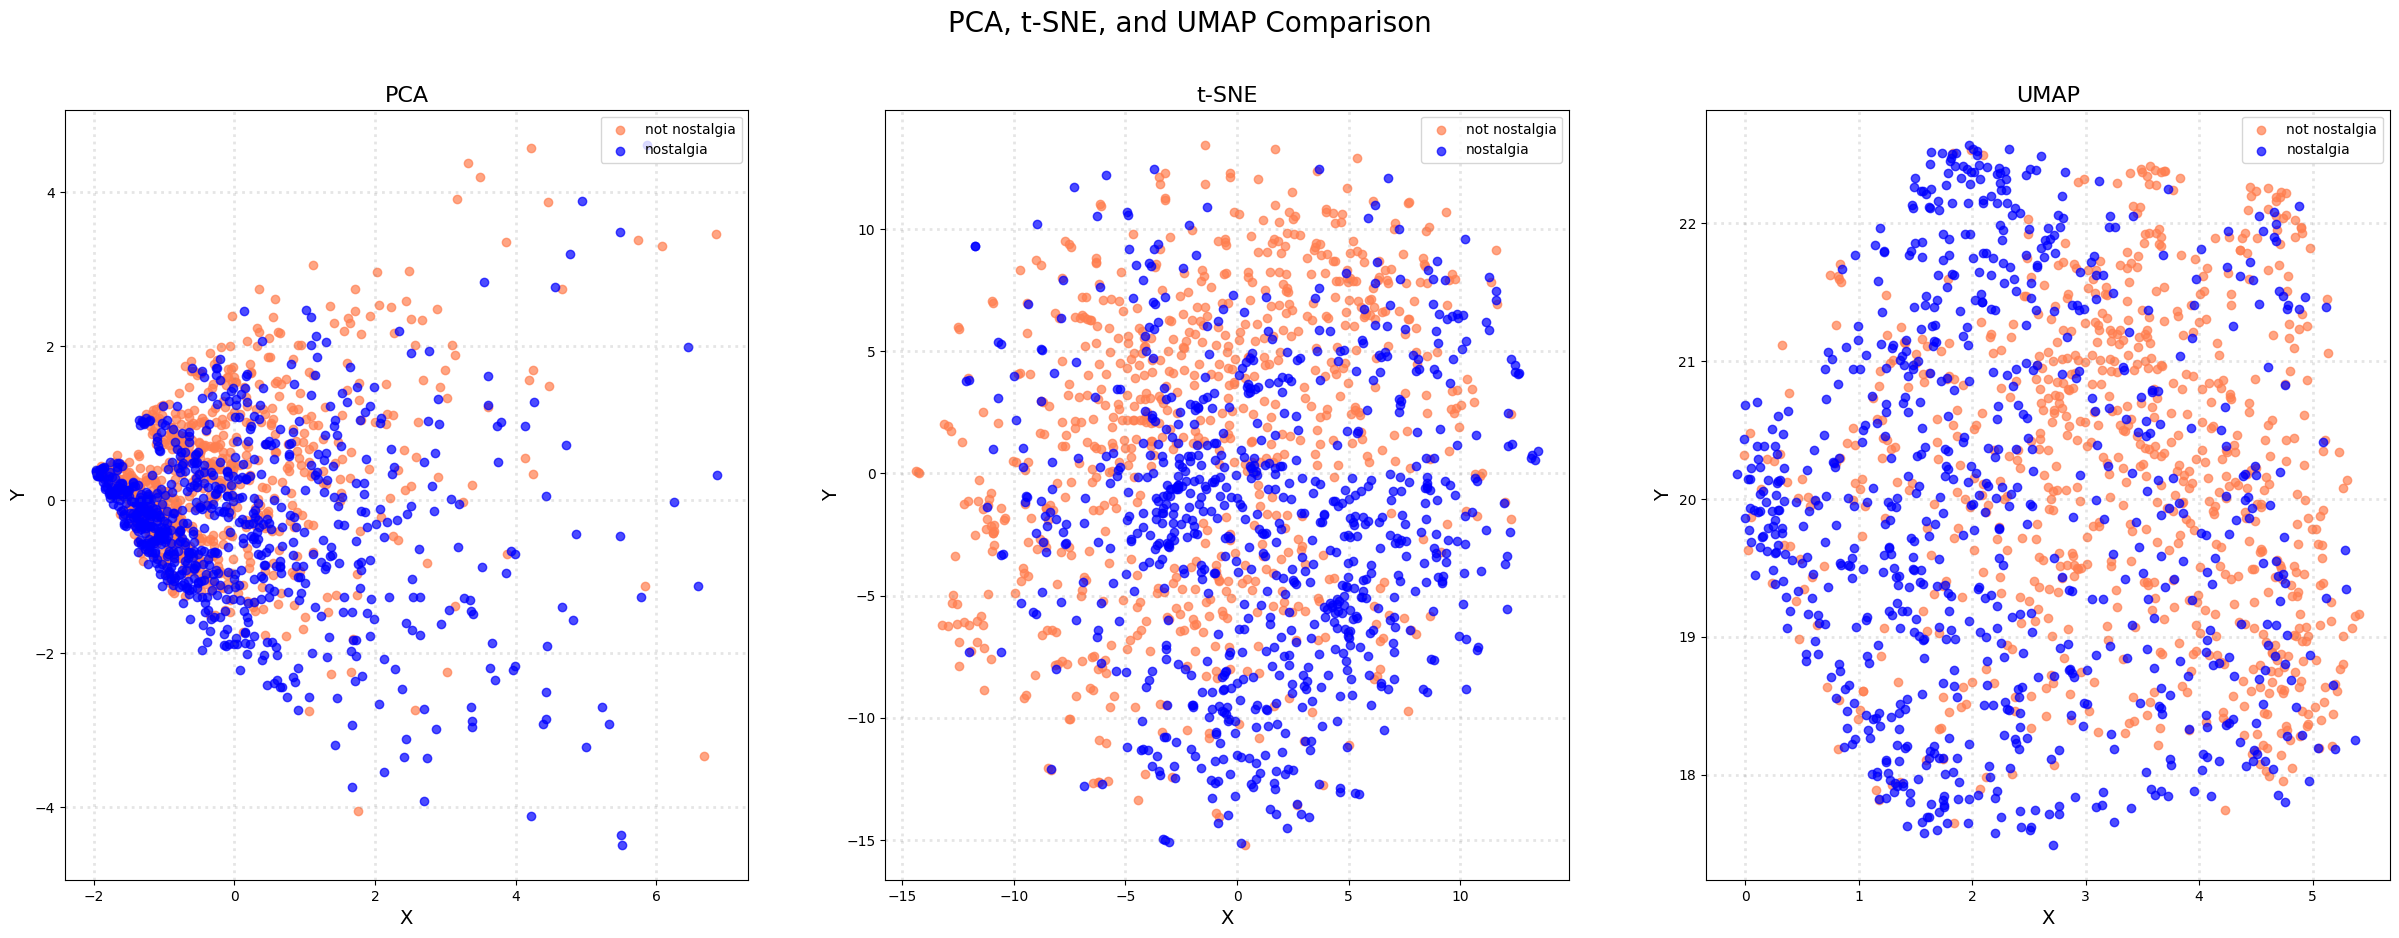

In [193]:
import matplotlib.pyplot as plt

# 定義要使用的顏色
col = ['coral', 'blue']  # 因為你只有兩個類別，對應兩種顏色
categories = df['sentiment'].unique()  # 取得 'sentiment' 中的類別 (nostalgia 和 not nostalgia)

# 建立 1x3 的子圖，用於展示 PCA、t-SNE 和 UMAP 結果
fig, axes = plt.subplots(1, 3, figsize=(30, 10))  
fig.suptitle('PCA, t-SNE, and UMAP Comparison', fontsize=20)

# 定義繪製散點圖的函式
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        # 根據類別篩選資料
        xs = X_reduced[df['sentiment'] == category][:, 0]  # 第1個主成分或降維維度
        ys = X_reduced[df['sentiment'] == category][:, 1]  # 第2個主成分或降維維度
        ax.scatter(xs, ys, c=c, marker='o', label=category, alpha=0.7)  # 繪製散點圖
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('X', fontsize=14)
    ax.set_ylabel('Y', fontsize=14)
    ax.legend(loc='upper right')

# 假設降維結果為以下變數，你需要在前面的程式中已經完成降維：
# df_pca_tdm, df_tsne_tdm, df_umap_tdm

# 在子圖上繪製 PCA、t-SNE 和 UMAP 的結果
plot_scatter(axes[0], df_pca_tdm, 'PCA')
plot_scatter(axes[1], df_tsne_tdm, 't-SNE')
plot_scatter(axes[2], df_umap_tdm, 'UMAP')

# 顯示所有子圖
plt.show()


In [194]:
# 確保 augmented_df 已包含 term-document matrix 和 pattern matrix 的資料
print("開始進行 PCA、t-SNE 和 UMAP 的降維操作，這可能需要一些時間...")

# 使用 PCA、t-SNE 和 UMAP 進行降維
df_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
df_tsne_aug = TSNE(n_components=2, random_state=42).fit_transform(augmented_df.values)
df_umap_aug = umap.UMAP(n_components=2, random_state=42).fit_transform(augmented_df.values)

print("降維完成！")

開始進行 PCA、t-SNE 和 UMAP 的降維操作，這可能需要一些時間...


C:\Users\thpss\anaconda3\envs\DataMining\lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


降維完成！


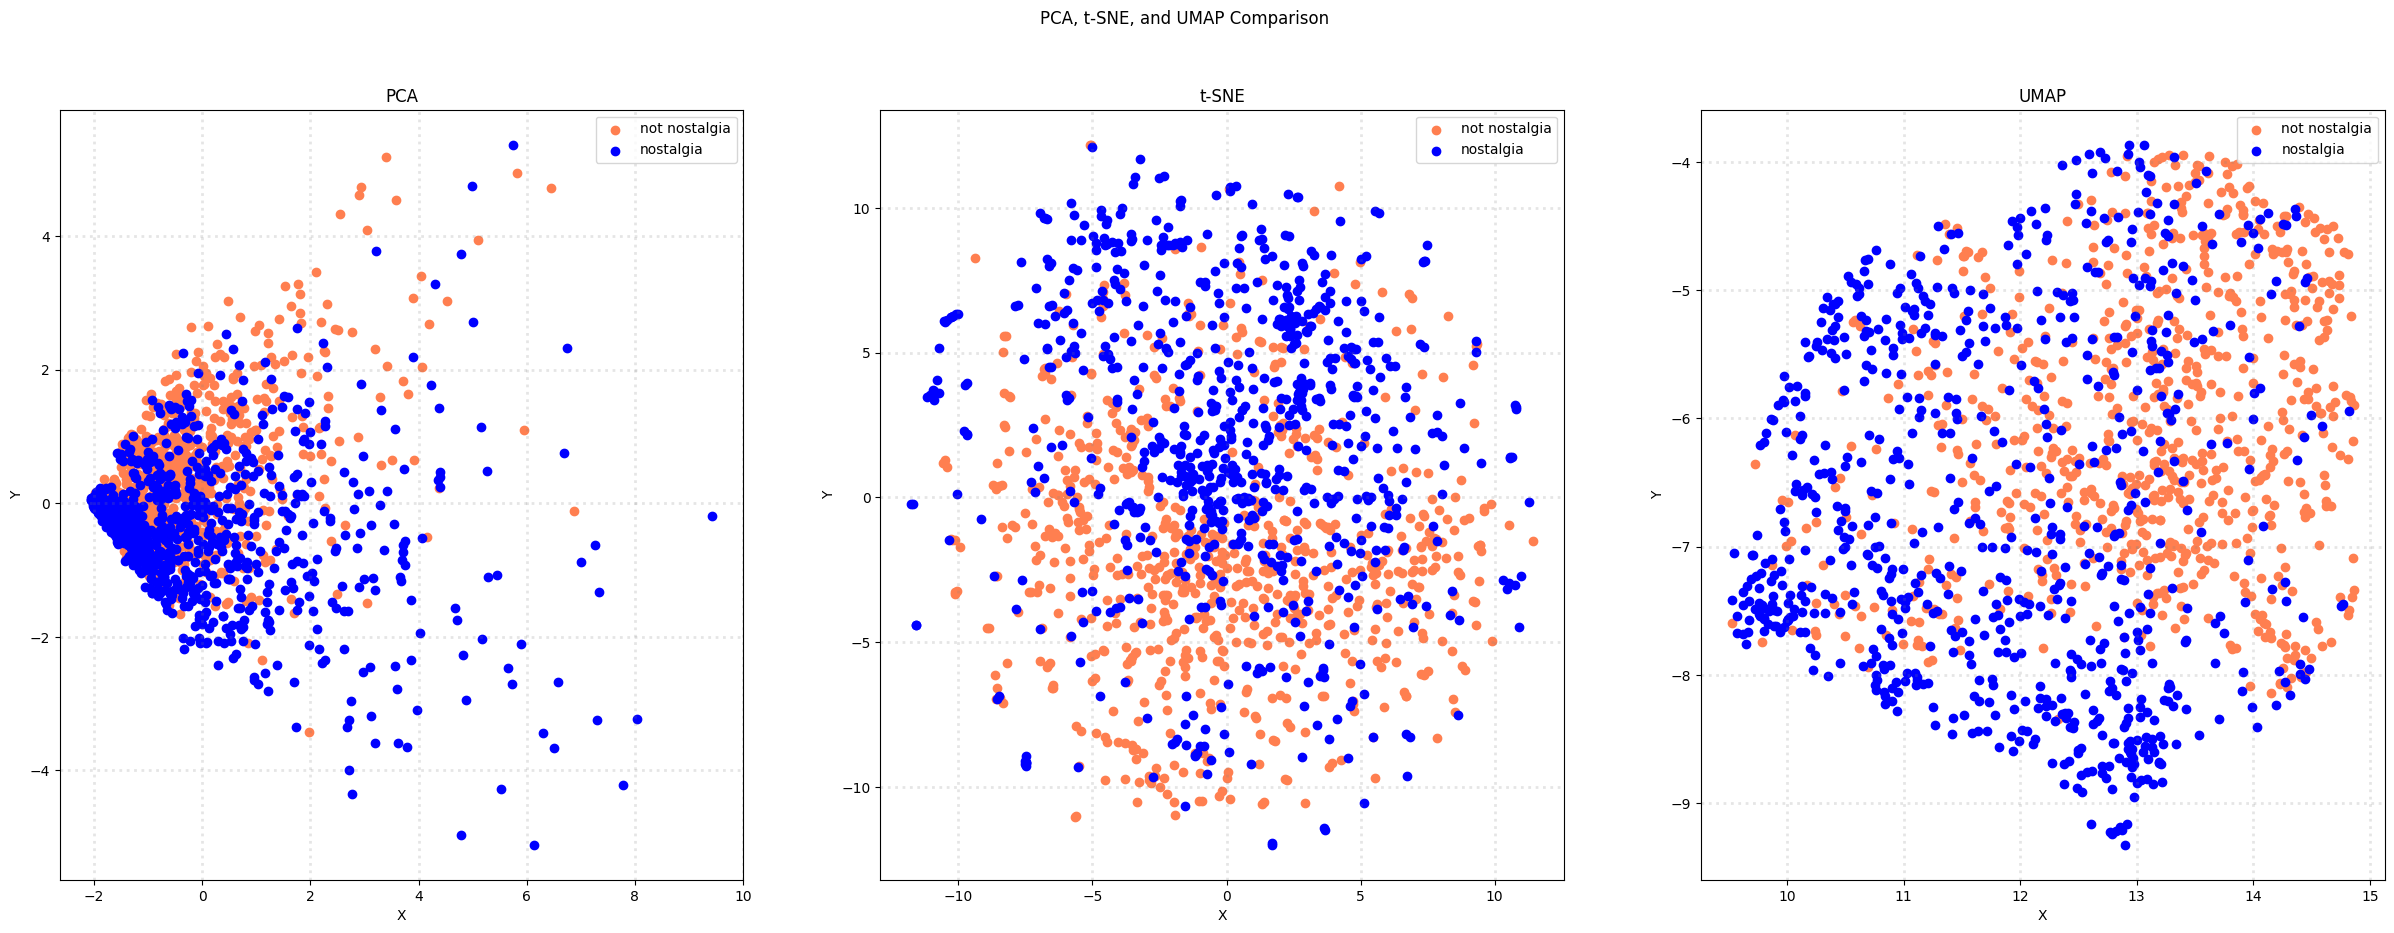

In [195]:
import matplotlib.pyplot as plt

# 設定顏色對應表
col = ['coral', 'blue']  # 因為你的資料集只有兩類：nostalgia 和 not nostalgia
categories = df['sentiment'].unique()  # 從你的資料集中取得類別標籤

# 建立三個子圖，分別展示 PCA、t-SNE 和 UMAP 的結果
fig, axes = plt.subplots(1, 3, figsize=(30, 10))  
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# 定義繪製散佈圖的函式
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[df['sentiment'] == category, 0]  # 根據類別篩選 X 軸資料
        ys = X_reduced[df['sentiment'] == category, 1]  # 根據類別篩選 Y 軸資料
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# 繪製 PCA, t-SNE, UMAP 的散佈圖
plot_scatter(axes[0], df_pca_aug, 'PCA')
plot_scatter(axes[1], df_tsne_aug, 't-SNE')
plot_scatter(axes[2], df_umap_aug, 'UMAP')

# 顯示圖表
plt.show()


### Exercise 18 -- 3D視覺圖表

C:\Users\thpss\anaconda3\envs\DataMining\lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


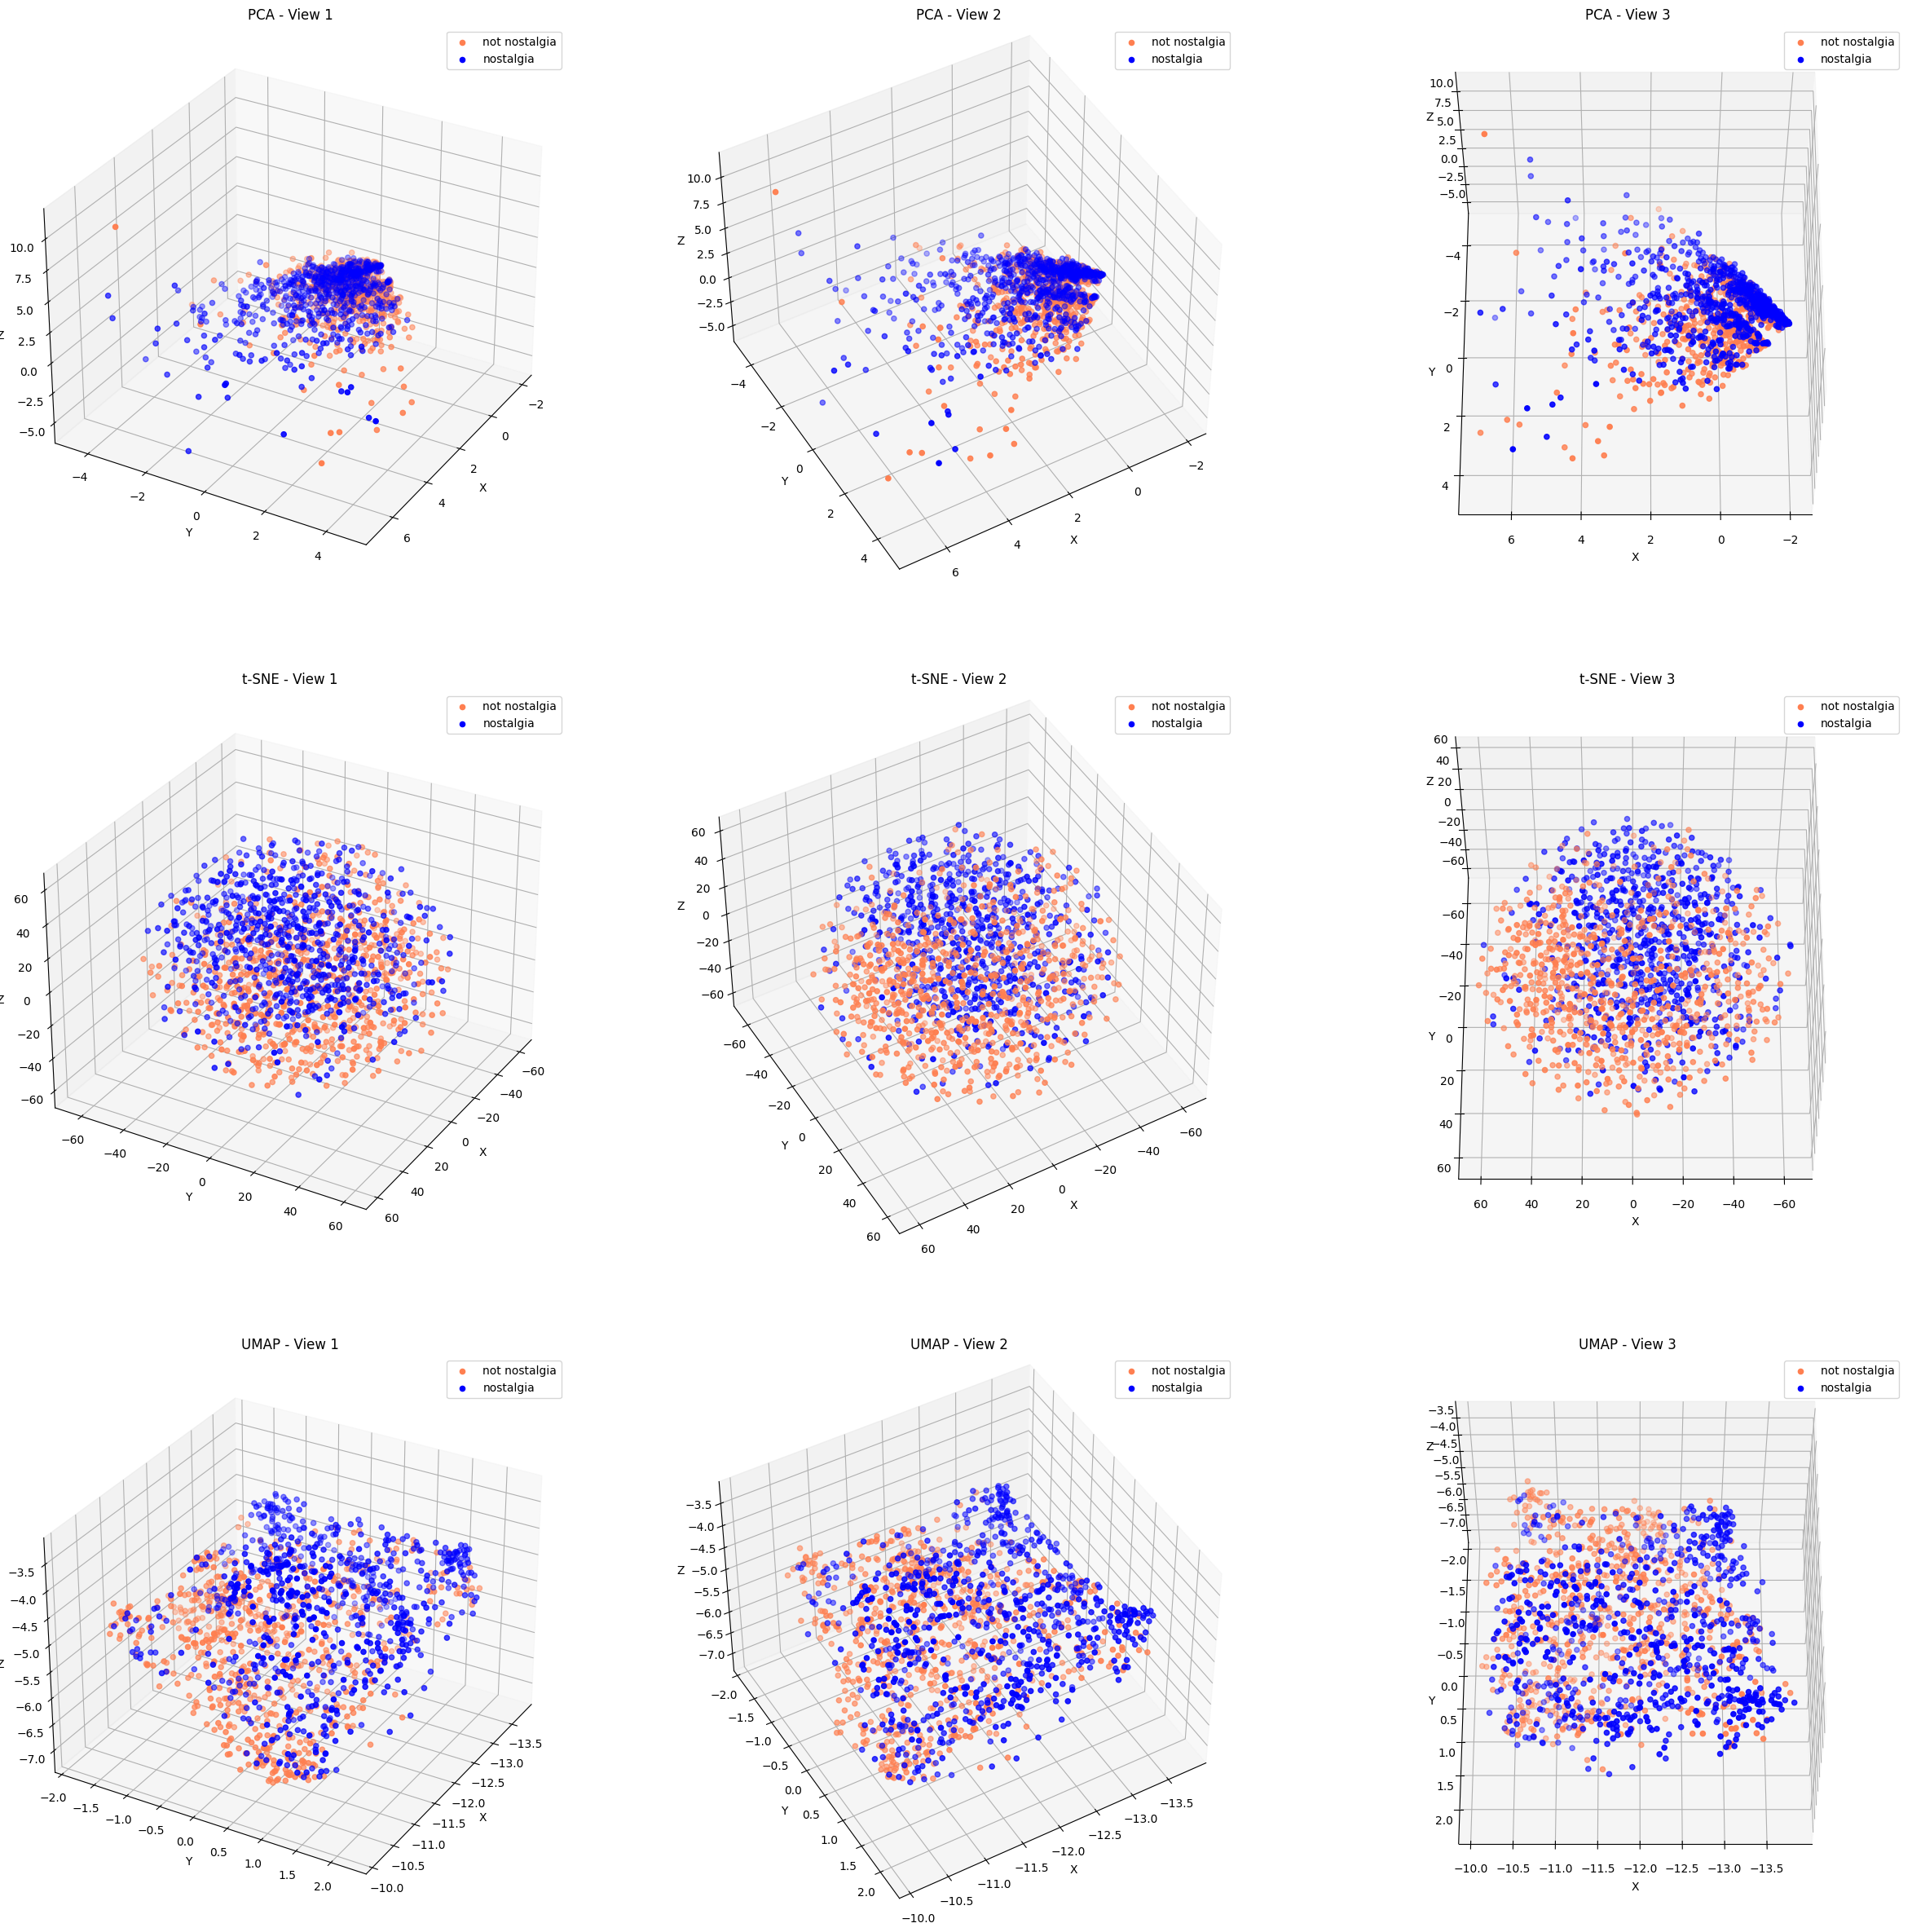

In [196]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 使用 term-document matrix 進行降維處理 (3D)
df_pca_tdm_3d = PCA(n_components=3).fit_transform(tdm_df.values)
df_tsne_tdm_3d = TSNE(n_components=3, random_state=42).fit_transform(tdm_df.values)
df_umap_tdm_3d = umap.UMAP(n_components=3, random_state=42).fit_transform(tdm_df.values)

# 定義顏色與類別
col = ['coral', 'blue']  # 對應 nostalgia 和 not nostalgia 兩類
categories = df['sentiment'].unique()  # 確認你的類別是 nostalgia 和 not nostalgia

# 定義繪製 3D 散點圖的函數
def plot_3d_scatter(X_reduced, title, ax, angle):
    for c, category in zip(col, categories):
        # 選擇對應類別的資料
        mask = df['sentiment'] == category
        xs = X_reduced[mask][:, 0]
        ys = X_reduced[mask][:, 1]
        zs = X_reduced[mask][:, 2]
        ax.scatter(xs, ys, zs, c=c, marker='o', label=category)

    ax.set_title(title)
    ax.view_init(elev=angle[0], azim=angle[1])  # 設定視角
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend(loc='upper right')

# 定義三個不同的視角 (elev, azim)
angles = [(30, 30), (45, 60), (60, 90)]

# 創建 9 張 3D 圖，每個降維方法對應三個不同視角
fig = plt.figure(figsize=(30, 30))

# PCA 圖
for i, angle in enumerate(angles):
    ax = fig.add_subplot(3, 3, i + 1, projection='3d')
    plot_3d_scatter(df_pca_tdm_3d, f'PCA - View {i + 1}', ax, angle)

# t-SNE 圖
for i, angle in enumerate(angles):
    ax = fig.add_subplot(3, 3, i + 4, projection='3d')
    plot_3d_scatter(df_tsne_tdm_3d, f't-SNE - View {i + 1}', ax, angle)

# UMAP 圖
for i, angle in enumerate(angles):
    ax = fig.add_subplot(3, 3, i + 7, projection='3d')
    plot_3d_scatter(df_umap_tdm_3d, f'UMAP - View {i + 1}', ax, angle)

# 顯示圖表
plt.show()


### 5.6 Discretization and Binarization

In [197]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [198]:
mlb = preprocessing.LabelBinarizer()

In [199]:
mlb.fit(df.sentiment)

LabelBinarizer()

In [200]:
df['bin_sentiment'] = mlb.transform(df['sentiment']).tolist()

In [201]:
df[0:9]

sentiment                                            comment  \
0  not nostalgia  He was a singer with a golden voice that I lov...   
1      nostalgia  The mist beautiful voice ever I listened to hi...   
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...   
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...   
4      nostalgia  listening to his songs reminds me of my mum wh...   
5      nostalgia  Every time I heard this song as a child, I use...   
6      nostalgia  My dad loved listening to Jim Reeves, when I w...   
7      nostalgia  i HAVE ALSO LISTENED TO Jim Reeves since child...   
8  not nostalgia           Wherever you  are you always in my heart   

   sentiment_encoded                                           unigrams  \
0                  0  [He, was, a, singer, with, a, golden, voice, t...   
1                  1  [The, mist, beautiful, voice, ever, I, listene...   
2                  1  [I, have, most, of, Mr., Reeves, songs, ., Alw...   
3                  0  [30, day, leave, from, 1st, tour, in, Viet, Na...   
4                  1  [listening, to, his, songs, reminds, me, of, m...   
5                  1  [Every, time, I, heard, this, song, as, a, chi...   
6                  1  [My, dad, loved, listening, to, Jim, Reeves, ,...   
7                  1  [i, HAVE, ALSO, LISTENED, TO, Jim, Reeves, sin...   
8                  0   [Wherever, you, are, you, always, in, my, heart]   

                                  tokenized_commment bin_sentiment  
0  {that, at, feel, have, was, love, still, a, si...           [1]  
1  {ever, kid, was, love, still, a, The, I, an, N...           [0]  
2  {how, gentle, at, simple, who, forgot, sounds,...           [0]  
3  {December, "marry, Lou., that, pray, receive.,...           [1]  
4  {everyday, me, of, him, listening, who, mum, m...           [0]  
5  {over, got, that, souls., fear, touches, still...           [0]  
6  {loved, how, things., was, 70's, a, teenager, ...           [0]  
7  {HAVE, 71, puts, childhood, love, a, since, I,...           [0]  
8        {are, always, heart, in, my, Wherever, you}           [1]

In [202]:
'''
Note: 這邊LabelBinarizer 跟我原本標註的01 是相反的，如果要讓它一致的話要做 "標籤反轉"
'''
# 將 bin_sentiment 從 list 提取成數字
df['bin_sentiment'] = df['bin_sentiment'].apply(lambda x: x[0])
df['bin_sentiment'] = 1 - df['bin_sentiment']
df[0:9]

sentiment                                            comment  \
0  not nostalgia  He was a singer with a golden voice that I lov...   
1      nostalgia  The mist beautiful voice ever I listened to hi...   
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...   
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...   
4      nostalgia  listening to his songs reminds me of my mum wh...   
5      nostalgia  Every time I heard this song as a child, I use...   
6      nostalgia  My dad loved listening to Jim Reeves, when I w...   
7      nostalgia  i HAVE ALSO LISTENED TO Jim Reeves since child...   
8  not nostalgia           Wherever you  are you always in my heart   

   sentiment_encoded                                           unigrams  \
0                  0  [He, was, a, singer, with, a, golden, voice, t...   
1                  1  [The, mist, beautiful, voice, ever, I, listene...   
2                  1  [I, have, most, of, Mr., Reeves, songs, ., Alw...   
3                  0  [30, day, leave, from, 1st, tour, in, Viet, Na...   
4                  1  [listening, to, his, songs, reminds, me, of, m...   
5                  1  [Every, time, I, heard, this, song, as, a, chi...   
6                  1  [My, dad, loved, listening, to, Jim, Reeves, ,...   
7                  1  [i, HAVE, ALSO, LISTENED, TO, Jim, Reeves, sin...   
8                  0   [Wherever, you, are, you, always, in, my, heart]   

                                  tokenized_commment  bin_sentiment  
0  {that, at, feel, have, was, love, still, a, si...              0  
1  {ever, kid, was, love, still, a, The, I, an, N...              1  
2  {how, gentle, at, simple, who, forgot, sounds,...              1  
3  {December, "marry, Lou., that, pray, receive.,...              0  
4  {everyday, me, of, him, listening, who, mum, m...              1  
5  {over, got, that, souls., fear, touches, still...              1  
6  {loved, how, things., was, 70's, a, teenager, ...              1  
7  {HAVE, 71, puts, childhood, love, a, since, I,...              1  
8        {are, always, heart, in, my, Wherever, you}              0

# 6. Data Exploration

In [203]:
# 隨機抽取三個不同的記錄，並將對應的 comment 儲存
document_to_transform_1 = []
random_record_1 = df.iloc[50]['comment']  # 抽取第 50 筆記錄的 comment
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = df.iloc[100]['comment']  # 抽取第 100 筆記錄的 comment
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = df.iloc[150]['comment']  # 抽取第 150 筆記錄的 comment
document_to_transform_3.append(random_record_3)

# 檢查抽取的內容
print("Document 1:", document_to_transform_1)
print("Document 2:", document_to_transform_2)
print("Document 3:", document_to_transform_3)


Document 1: ['If I remember correctly, this song came out after Mr. Reeves passed away. I was about 10 years old when the disc jockey said that the news just came over the wire that he died in a plane crash.']
Document 2: ['i guess most of us leave it too late before we tell someone just how much we really love them']
Document 3: ['my name is thomas but know by tommy and my wifes name is laura and i always sing this to her']


In [204]:
from sklearn.preprocessing import binarize

# 確保 CountVectorizer 已經初始化並適用於你的資料集
count_vect = CountVectorizer()
count_vect.fit(df['comment'])  # 使用你的整個資料集進行 fitting

# 將三個 document 轉換為向量
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# 將向量二值化：0 表示不存在，1 表示存在
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# 打印向量
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

'''
print("\nLet's take a look at the binarized vectors:")
print(document_vector_count_1_bin)
print(document_vector_count_2_bin)
print(document_vector_count_3_bin)
'''

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


'\nprint("\nLet\'s take a look at the binarized vectors:")\nprint(document_vector_count_1_bin)\nprint(document_vector_count_2_bin)\nprint(document_vector_count_3_bin)\n'

In [205]:
from sklearn.metrics.pairwise import cosine_similarity

# 計算 Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)[0][0]
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)[0][0]
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)[0][0]

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)[0][0]
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)[0][0]
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)[0][0]

# 輸出 Cosine Similarity 結果
print("Cosine Similarity using count bw 1 and 2: %.6f" % cos_sim_count_1_2)
print("Cosine Similarity using count bw 1 and 3: %.6f" % cos_sim_count_1_3)
print("Cosine Similarity using count bw 2 and 3: %.6f" % cos_sim_count_2_3)

print("Cosine Similarity using count bw 1 and 1: %.6f" % cos_sim_count_1_1)
print("Cosine Similarity using count bw 2 and 2: %.6f" % cos_sim_count_2_2)
print("Cosine Similarity using count bw 3 and 3: %.6f" % cos_sim_count_3_3)


Cosine Similarity using count bw 1 and 2: 0.032174
Cosine Similarity using count bw 1 and 3: 0.027864
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


### 7. Data Classification

In [206]:
df

sentiment                                            comment  \
0     not nostalgia  He was a singer with a golden voice that I lov...   
1         nostalgia  The mist beautiful voice ever I listened to hi...   
2         nostalgia  I have most of Mr. Reeves songs.  Always love ...   
3     not nostalgia  30 day leave from 1st tour in Viet Nam to conv...   
4         nostalgia  listening to his songs reminds me of my mum wh...   
...             ...                                                ...   
1495  not nostalgia  i don't know!..but the opening of the video,.....   
1496  not nostalgia  it's sad this is such a beautiful song when yo...   
1497  not nostalgia  Dear Friend, I think age and time is not that ...   
1498      nostalgia  I was born in 1954 and started to be aware of ...   
1499      nostalgia  This is the first CD I bought after my marriag...   

      sentiment_encoded                                           unigrams  \
0                     0  [He, was, a, singer, with, a, golden, voice, t...   
1                     1  [The, mist, beautiful, voice, ever, I, listene...   
2                     1  [I, have, most, of, Mr., Reeves, songs, ., Alw...   
3                     0  [30, day, leave, from, 1st, tour, in, Viet, Na...   
4                     1  [listening, to, his, songs, reminds, me, of, m...   
...                 ...                                                ...   
1495                  0  [i, do, n't, know, !, .., but, the, opening, o...   
1496                  0  [it, 's, sad, this, is, such, a, beautiful, so...   
1497                  0  [Dear, Friend, ,, I, think, age, and, time, is...   
1498                  1  [I, was, born, in, 1954, and, started, to, be,...   
1499                  1  [This, is, the, first, CD, I, bought, after, m...   

                                     tokenized_commment  bin_sentiment  
0     {that, at, feel, have, was, love, still, a, si...              0  
1     {ever, kid, was, love, still, a, The, I, an, N...              1  
2     {how, gentle, at, simple, who, forgot, sounds,...              1  
3     {December, "marry, Lou., that, pray, receive.,...              0  
4     {everyday, me, of, him, listening, who, mum, m...              1  
...                                                 ...            ...  
1495  {got, that, who, suggest, painter, know!..but,...              0  
1496  {how, love, afraid, really, a, sad, is, this, ...              0  
1497  {that, glad, is, I, this, you, when, not, and,...              0  
1498  {popular, at, who, commented,, 1954, been, pre...              1  
1499  {years., very, crying., bought, love, ended, s...              1  

[1499 rows x 6 columns]

In [207]:
# 引入必要的函式庫
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# 使用 'sentiment_encoded' 作為目標變數
y = df['sentiment_encoded']

# 分割訓練集和測試集 (70% 訓練，30% 測試)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, y, test_size=0.3, random_state=42)

In [208]:
X_train

00  000  045  07  10  100  10m  11  11th  12  ...  yours  yourself  \
486    0    0    0   0   0    0    0   0     0   0  ...      0         0   
528    0    0    0   0   0    0    0   0     0   0  ...      0         0   
200    0    0    0   0   0    0    0   0     0   0  ...      0         0   
890    0    0    0   0   0    0    0   0     0   0  ...      0         0   
845    0    0    0   0   0    0    0   0     0   0  ...      0         0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...    ...       ...   
1131   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1295   0    0    0   0   0    0    0   0     0   0  ...      0         0   
861    0    0    0   0   0    0    0   0     0   0  ...      0         0   
1460   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1127   0    0    0   0   0    0    0   0     0   0  ...      0         0   

      youth  youthful  youtube  yrs  yuo  yup  zealand  zulus  
486       0         0        0    0    0    0        0      0  
528       0         0        0    0    0    0        0      0  
200       0         0        0    0    0    0        0      0  
890       0         0        0    0    0    0        0      0  
845       0         0        0    0    0    0        0      0  
...     ...       ...      ...  ...  ...  ...      ...    ...  
1131      0         0        0    0    0    0        0      0  
1295      0         0        0    0    0    0        0      0  
861       0         0        0    0    0    0        0      0  
1460      0         0        0    0    0    0        0      0  
1127      0         0        0    0    0    0        0      0  

[1049 rows x 3730 columns]

In [209]:
X_test

00  000  045  07  10  100  10m  11  11th  12  ...  yours  yourself  \
1117   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1396   0    0    0   0   0    0    0   0     0   0  ...      0         0   
423    0    0    0   0   0    0    0   0     0   0  ...      0         0   
414    0    0    0   0   0    0    0   0     0   0  ...      0         0   
452    0    0    0   0   0    0    0   0     0   0  ...      0         0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...    ...       ...   
1084   0    0    0   0   0    0    0   0     0   0  ...      0         0   
991    0    0    0   0   0    0    0   0     0   0  ...      0         0   
651    0    0    0   0   0    0    0   0     0   0  ...      0         0   
1188   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1459   0    0    0   0   0    0    0   0     0   0  ...      0         0   

      youth  youthful  youtube  yrs  yuo  yup  zealand  zulus  
1117      0         0        0    0    0    0        0      0  
1396      0         0        0    0    0    0        0      0  
423       0         0        0    0    0    0        0      0  
414       0         0        0    0    0    0        0      0  
452       0         0        0    0    0    0        0      0  
...     ...       ...      ...  ...  ...  ...      ...    ...  
1084      0         0        0    0    0    0        0      0  
991       0         0        0    0    0    0        0      0  
651       0         0        2    0    0    0        0      0  
1188      0         0        0    0    0    0        0      0  
1459      0         0        0    0    0    0        0      0  

[450 rows x 3730 columns]

In [210]:
# 初始化 Naive Bayes 模型
nb_model = MultinomialNB()

# 訓練模型
nb_model.fit(X_train, y_train)

# 預測測試集結果
y_pred = nb_model.predict(X_test)

# 輸出分類報告和準確率
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['not nostalgia', 'nostalgia']))

# 計算並輸出模型準確率
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.9f}")

Classification Report:
               precision    recall  f1-score   support

not nostalgia       0.94      0.78      0.85       217
    nostalgia       0.82      0.95      0.88       233

     accuracy                           0.87       450
    macro avg       0.88      0.87      0.87       450
 weighted avg       0.88      0.87      0.87       450

Model Accuracy: 0.868888889


In [211]:
# 使用 'sentiment_encoded' 作為目標變數
y = df['sentiment_encoded']

# 分割訓練集和測試集 (70% 訓練，30% 測試)
X_train, X_test, y_train, y_test = train_test_split(augmented_df, y, test_size=0.3, random_state=42)

# 初始化 Naive Bayes 模型
nb_model = MultinomialNB()

# 訓練模型
nb_model.fit(X_train, y_train)

# 預測測試集結果
y_pred = nb_model.predict(X_test)

# 輸出分類報告和準確率
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['not nostalgia', 'nostalgia']))

# 計算並輸出模型準確率
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.9f}")

Classification Report:
               precision    recall  f1-score   support

not nostalgia       0.91      0.92      0.91       217
    nostalgia       0.92      0.91      0.92       233

     accuracy                           0.92       450
    macro avg       0.92      0.92      0.92       450
 weighted avg       0.92      0.92      0.92       450

Model Accuracy: 0.915555556


### HW Third Part-1: 
Generate meaningful new data visualizations. Refer to online resources and the Data Mining textbook for inspiration and ideas.

In [212]:
!pip install wordcloud 

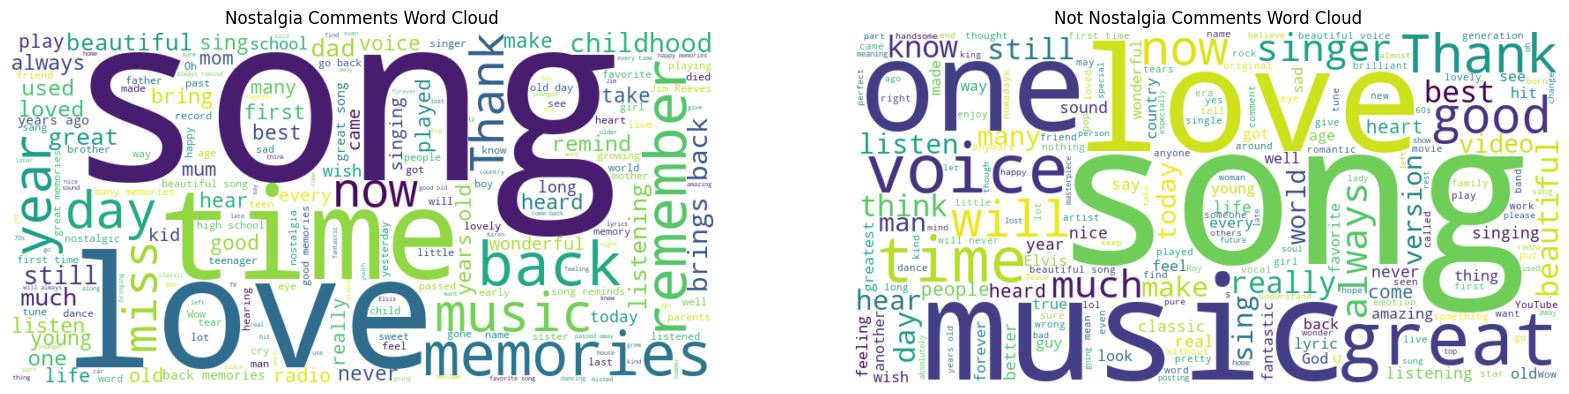

In [213]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 分別篩選出懷舊與非懷舊的評論
nostalgia_comments = df[df['sentiment'] == 'nostalgia']['comment']
not_nostalgia_comments = df[df['sentiment'] == 'not nostalgia']['comment']

# 合併所有評論成單一文字串
nostalgia_text = ' '.join(nostalgia_comments)
not_nostalgia_text = ' '.join(not_nostalgia_comments)

# 生成文字雲
nostalgia_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(nostalgia_text)
not_nostalgia_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(not_nostalgia_text)

# 顯示文字雲
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
axes[0].imshow(nostalgia_wordcloud, interpolation='bilinear')
axes[0].set_title('Nostalgia Comments Word Cloud')
axes[0].axis('off')

axes[1].imshow(not_nostalgia_wordcloud, interpolation='bilinear')
axes[1].set_title('Not Nostalgia Comments Word Cloud')
axes[1].axis('off')

plt.show()


### 用文字雲可以看到 Nostalgia 有 memoryies, back, remember, day , childhood 等等關鍵字

### HW Third Part-1: 
Generate TF-IDF features from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to
this Scikit-learn guide .

In [214]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [215]:
documents = df['comment'].values  # 取得所有評論

In [216]:
# 初始化 TF-IDF 向量化器
vectorizer = TfidfVectorizer(
    max_features=1000,  # 選擇最多 1000 個特徵詞（可根據需要調整）
    stop_words='english',  # 移除停用詞
    max_df=0.8,  # 過濾掉出現在 80% 以上文件中的詞
    min_df=5      # 只保留出現在至少 5 個文件中的詞
)

In [217]:
# 生成 TF-IDF 特徵矩陣
tfidf_matrix = vectorizer.fit_transform(documents)

# 將 TF-IDF 矩陣轉換為 DataFrame 以方便查看
tfidf_df = pd.DataFrame(
    tfidf_matrix.toarray(), 
    columns=vectorizer.get_feature_names_out()
)


In [218]:
# 查看生成的 TF-IDF 特徵矩陣
print(tfidf_df.head())


    10  100   11   12   13   14   15   16        17   18  ...  wrong  wrote  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...    0.0    0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...    0.0    0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.224917  0.0  ...    0.0    0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...    0.0    0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...    0.0    0.0   

   year     years  yes  yesterday  young  younger  youth  youtube  
0   0.0  0.000000  0.0        0.0    0.0      0.0    0.0      0.0  
1   0.0  0.000000  0.0        0.0    0.0      0.0    0.0      0.0  
2   0.0  0.000000  0.0        0.0    0.0      0.0    0.0      0.0  
3   0.0  0.124459  0.0        0.0    0.0      0.0    0.0      0.0  
4   0.0  0.000000  0.0        0.0    0.0      0.0    0.0      0.0  

[5 rows x 588 columns]


### HW Third Part-3: 
Implement a simple Naive Bayes classifier that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might
need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences. Refer to this article.

In [219]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, classification_report

In [220]:
X = df['comment']  # 特徵：評論文字
y = df['sentiment_encoded']  # 標籤：懷舊/非懷舊（已經被編碼為 0 和 1）

# 將資料集分為訓練集和測試集 (70% 訓練, 30% 測試)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [221]:
# 使用 CountVectorizer 轉換詞頻矩陣
count_vectorizer = CountVectorizer()
X_train_counts = count_vectorizer.fit_transform(X_train)
X_test_counts = count_vectorizer.transform(X_test)

# 使用 Multinomial Naive Bayes (適用於詞頻矩陣)
nb_counts = MultinomialNB()
nb_counts.fit(X_train_counts, y_train)

# 預測並計算準確率
y_pred_counts = nb_counts.predict(X_test_counts)
print("Accuracy (Word Frequency Features):", accuracy_score(y_test, y_pred_counts))
print("\nClassification Report (Word Frequency Features):\n", classification_report(y_test, y_pred_counts))


Accuracy (Word Frequency Features): 0.8688888888888889

Classification Report (Word Frequency Features):
               precision    recall  f1-score   support

           0       0.94      0.78      0.85       217
           1       0.82      0.95      0.88       233

    accuracy                           0.87       450
   macro avg       0.88      0.87      0.87       450
weighted avg       0.88      0.87      0.87       450



In [222]:
# 使用 TfidfVectorizer 轉換 TF-IDF 矩陣
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# 使用 Bernoulli Naive Bayes（適合於 TF-IDF 特徵矩陣）
nb_tfidf = BernoulliNB()
nb_tfidf.fit(X_train_tfidf, y_train)

# 預測並計算準確率
y_pred_tfidf = nb_tfidf.predict(X_test_tfidf)
print("Accuracy (TF-IDF Features):", accuracy_score(y_test, y_pred_tfidf))
print("\nClassification Report (TF-IDF Features):\n", classification_report(y_test, y_pred_tfidf))


Accuracy (TF-IDF Features): 0.8844444444444445

Classification Report (TF-IDF Features):
               precision    recall  f1-score   support

           0       0.93      0.82      0.87       217
           1       0.85      0.94      0.89       233

    accuracy                           0.88       450
   macro avg       0.89      0.88      0.88       450
weighted avg       0.89      0.88      0.88       450



### HW Fourth Part:

In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent
parts you noticed? How can you improve the Data preprocessing for these specific datasets?

answer:
在這次 Lab 中，雖然有使用 NLTK 套件進行文字的 tokenize，但卻沒有直接利用 NLTK 或 SpaCy 等工具進行 stop words 的移除。相反地，Lab 的流程是在後續分析中透過篩選詞頻的前 5% 來移除部分詞彙。然而，這種方式有時候可能會導致一些真正重要的資訊也被誤刪。

我認為應該在資料前處理時，先使用 NLTK 或 SpaCy 進行 stop words 的移除，以減少無關資訊對模型的干擾。接著，在處理完 stop words 之後，再分析詞頻的前幾%，檢查是否還有其他不重要的詞彙會對分析造成 bias，再進行額外移除。這樣能更有效地避免誤刪關鍵詞，保持資料的重要資訊。

此外，還可以進一步使用 NLTK 或 SpaCy 進行 詞性還原（lemmatization） 或 詞幹提取（stemming），使不同形式的詞彙能被正確識別為同一詞根，從而提升分析的準確度。